In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [2]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
print(len(osc_weight_MC))
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])

38885781
          event_no  osc_weight
28956376  28956376         NaN
          event_no  osc_weight
28956376  28956376         0.0


/tmp/ipykernel_34538/382299087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0


In [3]:
indir_track_cascade_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"
indir_energy_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/energy_Burnsample_RD_Full_db.csv"
indir_zenith_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/zenith_Burnsample_RD_Full_db.csv"
indir_azimuth_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/azimuth_Burnsample_RD_Full_db.csv"
#indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/pid_Burnsample_RD_Full_db.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"
indir_lvl3_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/lvl3_variables_burnsample.csv"
indir_position_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/['position_x', 'position_y', 'position_z']_Burnsample_RD_Full_db.csv"



indir_track_cascade_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
indir_lvl3_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/lvl3_variables_new_muon.csv"
indir_position_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"


In [4]:
track_cascade_RD = pd.read_csv(indir_track_cascade_RD).sort_values('event_no').reset_index(drop = True)
energy_RD = pd.read_csv(indir_energy_RD).sort_values('event_no').reset_index(drop = True)
zenith_RD = pd.read_csv(indir_zenith_RD).sort_values('event_no').reset_index(drop = True)
azimuth_RD = pd.read_csv(indir_azimuth_RD).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)
lvl3_RD = pd.read_csv(indir_lvl3_RD, usecols = ['event_no','L3_oscNext_bool']).sort_values('event_no').reset_index(drop = True)
position_RD = pd.read_csv(indir_position_RD).sort_values('event_no').reset_index(drop = True)

track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)
lvl3_MC = pd.read_csv(indir_lvl3_MC, usecols = ['event_no','L3_oscNext_bool']).sort_values('event_no').reset_index(drop = True)
position_MC = pd.read_csv(indir_position_MC).sort_values('event_no').reset_index(drop = True)

In [5]:
print(np.shape(energy_RD))
print(np.shape(multiclass_RD))
print(np.shape(track_cascade_RD))
print(np.shape(zenith_RD))
print(np.shape(azimuth_RD))
print(np.shape(position_RD))

(61739862, 3)
(61739862, 6)
(61739862, 3)
(61739862, 4)
(61739862, 4)
(61739862, 5)


In [6]:
print(np.shape(energy_MC))
print(np.shape(multiclass_MC))
print(np.shape(osc_weight_MC))
print(np.shape(track_cascade_MC))
print(np.shape(zenith_MC))
print(np.shape(azimuth_MC))
print(np.shape(position_MC))


(37235782, 4)
(37235782, 6)
(38885781, 2)
(37235782, 5)
(37235782, 4)
(37235782, 4)
(37235782, 8)


In [7]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_muon_i3_files = 1093
nr_noise_i3_files = 401

nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 169737 + 550000
nr_noise_total = 321103 + 550000

nr_electron_neutrinos_test = 8118575
nr_muon_neutrinos_test = 19923619
nr_tau_neutrinos_test = 8702748
nr_muon_test = 169737
nr_noise_test =321103

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

0.001698641060838674 0.0006648233149566109 0.0030570841456206404
878    1.375828e-07
890    2.086777e-07
904    1.883566e-07
916    2.064462e-07
930    1.458803e-07
932    1.216562e-07
938    3.205147e-07
945    2.292233e-07
946    2.398221e-07
956    1.527254e-07
Name: osc_weight, dtype: float64


/tmp/ipykernel_34538/3908699960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight


878    2.337037e-10
890    3.544685e-10
904    3.199503e-10
916    3.506780e-10
930    2.477983e-10
932    2.066502e-10
938    5.444394e-10
945    3.893682e-10
946    4.073716e-10
956    2.594257e-10
Name: osc_weight, dtype: float64


/tmp/ipykernel_34538/3908699960.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_34538/3908699960.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
/tmp/ipykernel_34538/3908699960.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [8]:
track_cascade_MC = pd.merge(track_cascade_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
energy_MC = pd.merge(energy_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
zenith_MC = pd.merge(zenith_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
azimuth_MC = pd.merge(azimuth_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
position_MC = pd.merge(position_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)


In [9]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)
track_cascade_RD['osc_weight'] = np.ones(len(track_cascade_RD))*Burnsample_weight
energy_RD['osc_weight'] = np.ones(len(energy_RD))*Burnsample_weight 
zenith_RD['osc_weight'] = np.ones(len(zenith_RD))*Burnsample_weight 
azimuth_RD['osc_weight'] = np.ones(len(azimuth_RD))*Burnsample_weight 
multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 
position_RD['osc_weight'] = np.ones(len(position_RD))*Burnsample_weight 

In [10]:
lvl3_MC_passed_event_nos = lvl3_MC['event_no'][lvl3_MC['L3_oscNext_bool'] == 1].to_list()
lvl3_RD_passed_event_nos = lvl3_RD['event_no'][lvl3_RD['L3_oscNext_bool'] == 1].to_list()
print('fraction passed MC = ',len(lvl3_MC_passed_event_nos)/len(lvl3_MC))
print('fraction passed RD = ',len(lvl3_RD_passed_event_nos)/len(lvl3_RD))

track_cascade_RD = track_cascade_RD[track_cascade_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
energy_RD = energy_RD[energy_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
zenith_RD = zenith_RD[zenith_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
azimuth_RD = azimuth_RD[azimuth_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
multiclass_RD = multiclass_RD[multiclass_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
position_RD = position_RD[position_RD['event_no'].isin(lvl3_RD_passed_event_nos)]


track_cascade_MC = track_cascade_MC[track_cascade_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
energy_MC = energy_MC[energy_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
zenith_MC = zenith_MC[zenith_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
azimuth_MC = azimuth_MC[azimuth_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
multiclass_MC = multiclass_MC[multiclass_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
position_MC = position_MC[position_MC['event_no'].isin(lvl3_MC_passed_event_nos)]

print(np.shape(energy_MC))
print(np.shape(multiclass_MC))
print(np.shape(track_cascade_MC))
print(np.shape(zenith_MC))
print(np.shape(azimuth_MC))
print(np.shape(position_MC))

print(np.shape(energy_RD))
print(np.shape(multiclass_RD))
print(np.shape(track_cascade_RD))
print(np.shape(zenith_RD))
print(np.shape(azimuth_RD))
print(np.shape(position_RD))

fraction passed MC =  0.5778769365594072
fraction passed RD =  0.036074197898271945
(22083606, 5)
(22083606, 7)
(22083606, 6)
(22083606, 5)
(22083606, 5)
(22083606, 9)
(2227216, 4)
(2227216, 7)
(2227216, 4)
(2227216, 5)
(2227216, 5)
(2227216, 6)


[0.09571858 0.08489319 0.07441932 0.06618756 0.05963968 0.0552487
 0.0507251  0.04785265 0.04623589 0.04440528]
[0.06954719 0.06079601 0.05296935 0.04673339 0.04218332 0.03912426
 0.03578875 0.03416632 0.03287018 0.03144715]


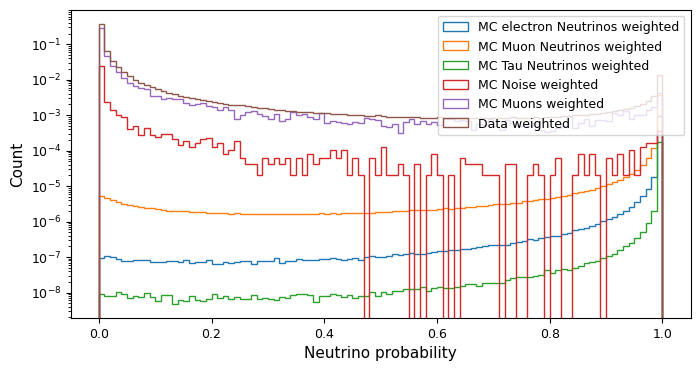

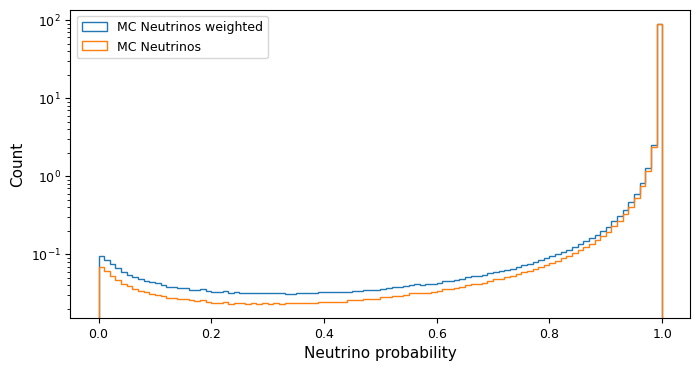

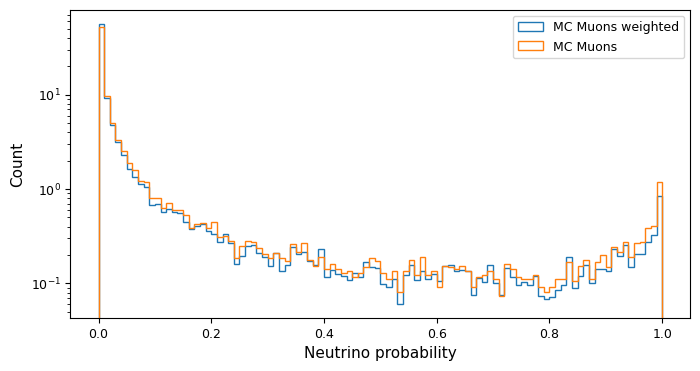

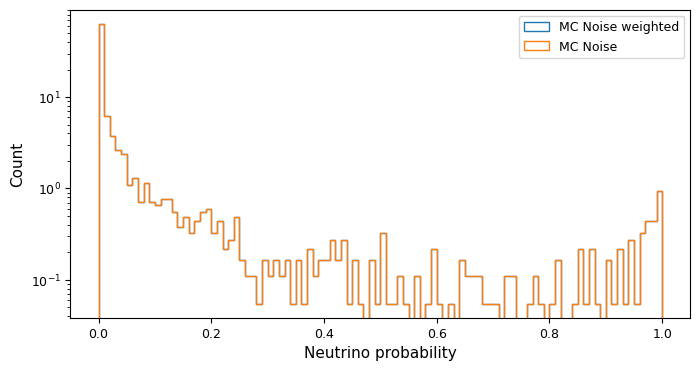

In [11]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC electron Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-14,14))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Muon Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-14,14))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-16,16))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Tau Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-16,16))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_test_weights, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_use,density=False,alpha=1,histtype='step',label='Data weighted',weights=multiclass_RD['osc_weight'])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()



bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_test, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Neutrinos')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()
print(counts_test_weights[:10])
print(counts_test[:10])

fig,axs =  plt.subplots(figsize=(8, 4))
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Muons')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig,axs =  plt.subplots(figsize=(8, 4))
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Noise')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

[0.8632267  1.30524708 1.67380333]
True


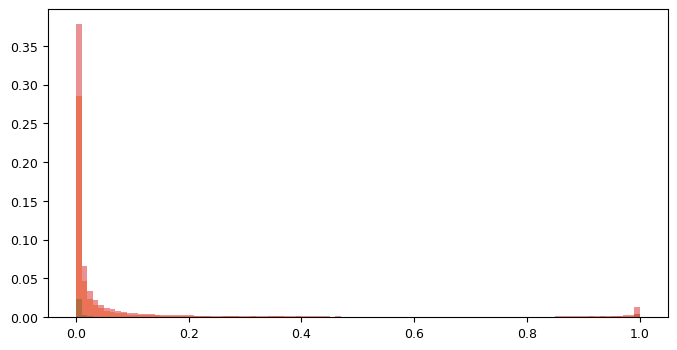

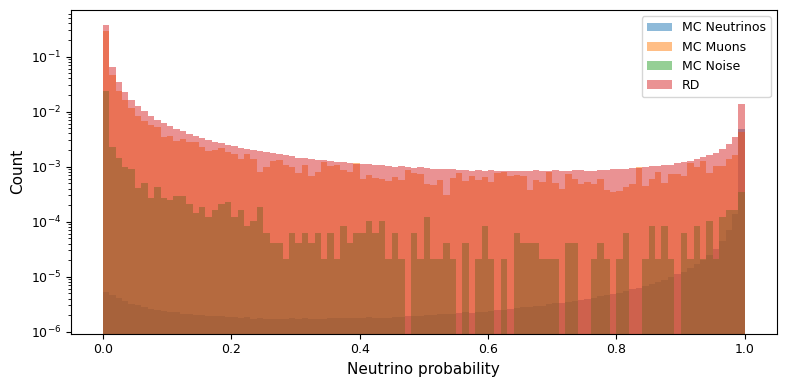

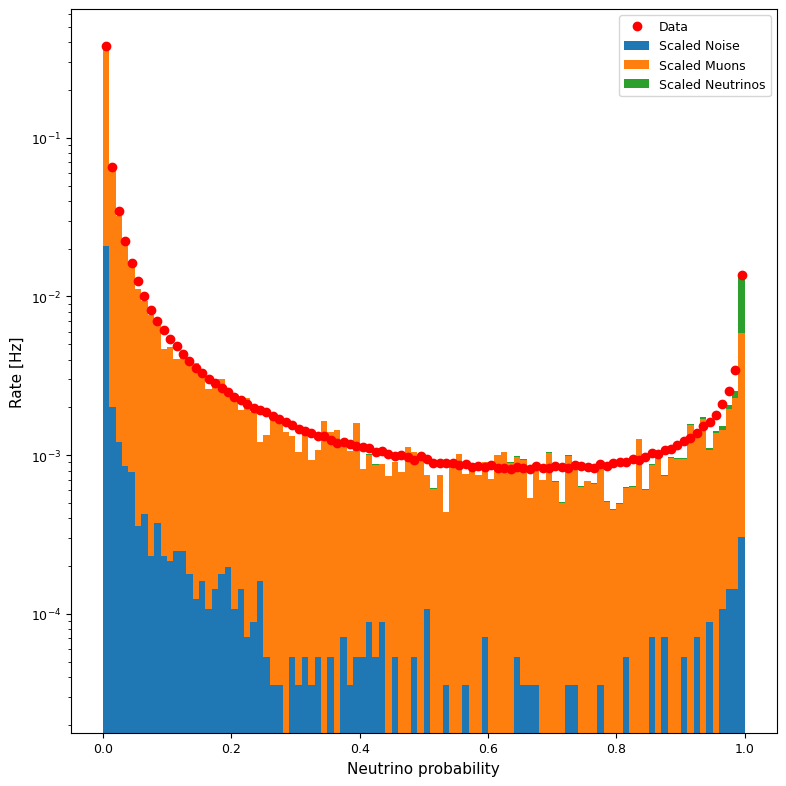

In [12]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])



fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [1,1,1]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#


bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 8))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Neutrino probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [13]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Final_plotting_Peter/New_muon_db/with_lvl_3_taken_care_off/Neutrino_prob_logit_MC_lvl_3.csv"
load_logit_MC = False
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)
#multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)



safe_load_place_RD = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Final_plotting_Peter/New_muon_db/with_lvl_3_taken_care_off/Neutrino_prob_logit_RD_lvl_3.csv"
load_logit_RD = False
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)
    multiclass_RD['pid_neutrino_pred_logit'].to_csv(safe_load_place_RD)
#multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)


In [14]:
print(multiclass_MC['pid_neutrino_pred_logit'])

1           10.701469
2           16.118096
4           15.333239
5           13.118694
11          10.819361
              ...    
37235760     9.738094
37235764    16.118096
37235765    16.118096
37235779    16.118096
37235781     7.101512
Name: pid_neutrino_pred_logit, Length: 22083606, dtype: float64


[0.00000000e+00 2.88645968e-05 4.09508751e-06 4.26328374e-06
 4.68950505e-06 5.55231553e-06 6.33774770e-06 7.99159577e-06
 9.80816369e-06 1.22279119e-05]
[0.15033597 1.36495896 1.33570564]
True


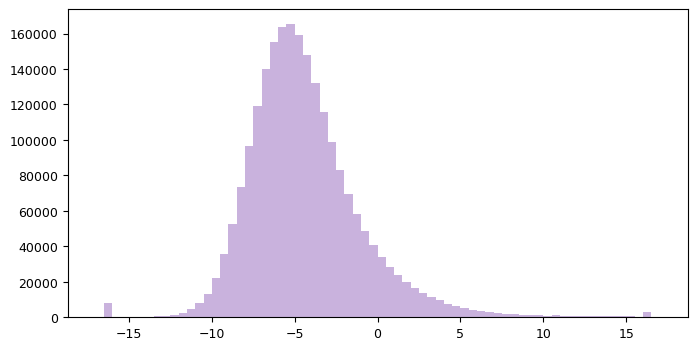

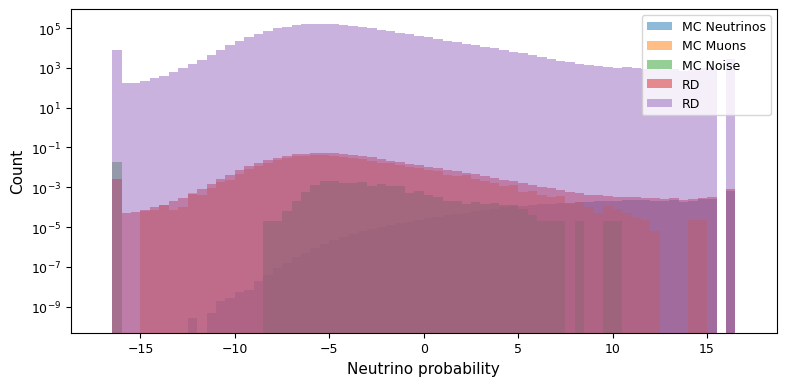

In [15]:
bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = bins_to_use#np.linspace(-17,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])
counts_RD_fit_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD')


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'])
counts_RD_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD')


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()

multiclass_uncertainty_RD_fit = np.zeros_like(counts_RD_fit_not_rate)
for i in range(len(multiclass_uncertainty_RD_fit)):
    if counts_RD_fit_not_rate[i]!= 0 :
        multiclass_uncertainty_RD_fit[i] = (1/np.sqrt(counts_RD_fit_not_rate[i])) * counts_RD_fit[i]

print(multiclass_uncertainty_RD_fit[:10])

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/multiclass_uncertainty_RD_fit[i]**2
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]



# fig, axs = plt.subplots(figsize=(8, 5))


# axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
# axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
# axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


# axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
# axs.set_xlabel('Neutrino probability')
# axs.set_ylim(bottom=10**-5)
# axs.set_ylabel('Rate [Hz]')
# axs.set_yscale('log')
# axs.legend(loc='upper right')

# fig.tight_layout()




In [16]:
Neutrino_cut = 12
pure_neutrino_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > Neutrino_cut]
pure_neutrino_selection_MC_noise_and_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-13,13,-1,1)))]
pure_neutrino_selection_MC = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-1,1,-12,12,-13,13,-14,14,-16,16)))]
print('There are this many muons and noise selected away:',len(pure_neutrino_selection_MC_noise_and_muons))
print(multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())].value_counts())

There are this many muons and noise selected away: 3
 14.0    3433397
 16.0    1762962
 12.0    1548897
-14.0    1512647
-12.0     687628
-16.0     664070
 13.0          3
Name: pid, dtype: int64


In [17]:
sneaky_muons = multiclass_MC[(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-13,13)))]
sneaky_muons['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
print(sneaky_muons.head(3))

/tmp/ipykernel_34538/3168727236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
/tmp/ipykernel_34538/3168727236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
/tmp/ipykernel_34538/3168727236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

          Unnamed: 0  pid_noise_pred  pid_muon_pred  pid_neutrino_pred   pid  \
8849157     24284934    1.821025e-15   2.955644e-07           1.000000  13.0   
35066641    17977297    5.788667e-20   6.506573e-07           0.999999  13.0   
35963445    21165363    9.016794e-14   4.572803e-06           0.999995  13.0   

            event_no  osc_weight  pid_neutrino_pred_logit      energy  \
8849157    9236982.0    0.000024                14.898982  219.173837   
35066641  36628082.0    0.000022                14.177849  291.446937   
35963445  37560539.0    0.000007                12.282959  221.859424   

          energy_pred    zenith  zenith_pred   azimuth  azimuth_pred  \
8849157     40.188942  0.898164     0.918870  0.124282      0.148466   
35066641    76.569054  1.110239     0.969214  5.858480      5.348859   
35963445    78.911400  1.251024     1.423593  2.290529      1.653761   

          track_mu_pred  
8849157        0.345632  
35066641       0.187883  
35963445       0.16

/tmp/ipykernel_34538/3168727236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]


In [18]:
print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC_noise_and_muons.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())]))
print(len(pure_neutrino_selection_MC))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_neutrino_selection_RD.to_list())]))
print(len(pure_neutrino_selection_RD))

this is the rate of muons surviving 5.238606097941867e-05
0.0022769484566851476
9609604
0.002773715281501204
8753


In [19]:
print('this many pure neutrinos RD',len(pure_neutrino_selection_RD))
print('this many pure neutrinos MC',len(pure_neutrino_selection_MC))
track_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==1]
cascade_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==0]

pure_neutrino_track_selection = track_event_no[track_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)

pure_neutrino_cascade_selection = cascade_event_no[cascade_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)
#print(track_event_no)
#print(cascade_event_no)

this many pure neutrinos RD 8753
this many pure neutrinos MC 9609604


In [20]:
print(np.sum(multiclass_RD['osc_weight'])/np.sum(multiclass_MC['osc_weight']))

1.290227675561317


In [21]:
from scipy import stats as sci


[     0.   8297.    167.    181.    219.    307.    400.    636.    958.
   1489.   2606.   4498.   7915.  13353.  22349.  35565.  52509.  73221.
  96384. 119006. 139775. 155093. 163677. 165406. 158893. 148018. 132311.
 115913.  98883.  83066.  69427.  58414.  48371.  40632.  33817.]
[ 0.         91.08786966 12.92284798 13.45362405 14.79864859 17.52141547
 20.         25.21904043 30.95157508 38.58756276]
[0.         0.01097841 0.07738232 0.07432941 0.06757374 0.05707301
 0.05       0.03965258 0.03230853 0.02591509]
[0.00000000e+00 2.88645968e-05 4.09508751e-06 4.26328374e-06
 4.68950505e-06 5.55231553e-06 6.33774770e-06 7.99159577e-06
 9.80816369e-06 1.22279119e-05]
16025.418753804193
16025.418753804193
0.0


/tmp/ipykernel_34538/3712711658.py:24: RuntimeWarning: divide by zero encountered in divide
  multiclass_logit_ratio = counts_RD/(counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
/tmp/ipykernel_34538/3712711658.py:24: RuntimeWarning: invalid value encountered in divide
  multiclass_logit_ratio = counts_RD/(counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
/groups/icecube/peter/anaconda3/envs/graphnet/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


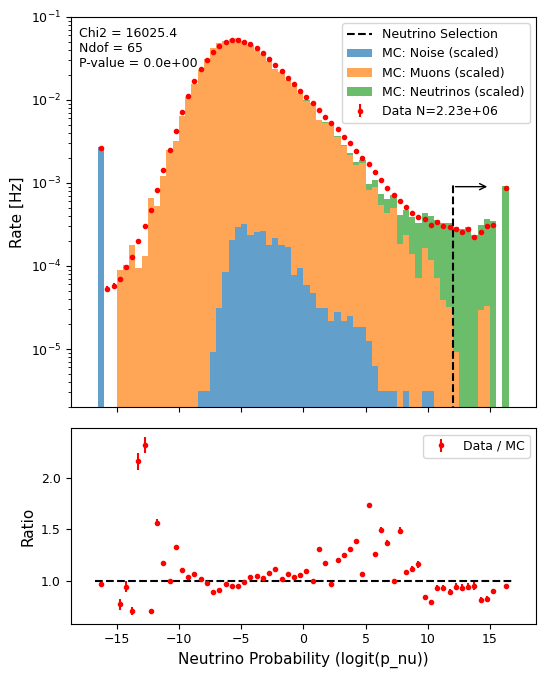

In [22]:

bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2



print(counts_RD_not_rate[:35])
RD_uncertainties_on_count = np.sqrt(counts_RD_not_rate)
print(RD_uncertainties_on_count[:10])
RD_percent_uncertainty_on_count = np.zeros_like(RD_uncertainties_on_count)
RD_uncertainties_on_rate = np.zeros_like(RD_uncertainties_on_count)

for i in range(len(RD_uncertainties_on_count)):
    if RD_uncertainties_on_count[i] == 0:
        RD_uncertainties_on_rate[i] = 0
        RD_percent_uncertainty_on_count[i] = 0
    else:
        RD_percent_uncertainty_on_count[i] = RD_uncertainties_on_count[i]/counts_RD_not_rate[i]
        RD_uncertainties_on_rate[i] = counts_RD[i]*RD_percent_uncertainty_on_count[i]

print(RD_percent_uncertainty_on_count[:10])
print(RD_uncertainties_on_rate[:10])

multiclass_logit_ratio = counts_RD/(counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
multiclass_logit_ratio_uncertainties = multiclass_logit_ratio*RD_percent_uncertainty_on_count

multiclass_logit_residual = counts_RD - (counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
multiclass_logit_chi_2 = 0
for i in range(len(multiclass_logit_residual)):
    if RD_uncertainties_on_rate[i] !=0:
        multiclass_logit_chi_2 += (multiclass_logit_residual[i]/RD_uncertainties_on_rate[i])**2
print(multiclass_logit_chi_2)
multiclass_logit_ndof = len(bins_middle) - 3
print(multiclass_logit_chi_2)
multiclass_logit_p_value = sci.chi2.sf(multiclass_logit_chi_2,multiclass_logit_ndof)
print(multiclass_logit_p_value)

figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

axs[0].bar(bins_middle,counts_noise_plot,width=bin_width,label='MC: Noise (scaled)',alpha=0.7)
axs[0].bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='MC: Muons (scaled)',alpha=0.7)
axs[0].bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='MC: Neutrinos (scaled)',alpha=0.7)
axs[0].errorbar(x=bins_middle,y=counts_RD,yerr=RD_uncertainties_on_rate,fmt='.',label='Data N={:.2e}'.format(int(np.sum(counts_RD_not_rate))),color='red')
axs[0].vlines(Neutrino_cut,0,10**(-3),color='black',label='Neutrino Selection',linestyles='dashed')

axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1,bottom=2*10**(-6))
#axs[0].set_xlim(-17,17)
axs[0].legend(loc='upper right')
axs[0].annotate("", xy=(Neutrino_cut+3, 0.9*10**(-3)), xytext=(Neutrino_cut, 0.9*10**(-3)),
            arrowprops=dict(arrowstyle="->"))
axs[0].text(-18, 0.025, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}'.format(multiclass_logit_chi_2,multiclass_logit_ndof,multiclass_logit_p_value),fontsize=9)
axs[1].set_xlabel('Neutrino Probability (logit(p_nu))')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,multiclass_logit_ratio,yerr=multiclass_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'multiclass_neutrino_prob.png',bbox_inches='tight',dpi=1200)

[     0.   8297.    167.    181.    219.    307.    400.    636.    958.
   1489.   2606.   4498.   7915.  13353.  22349.  35565.  52509.  73221.
  96384. 119006. 139775. 155093. 163677. 165406. 158893. 148018. 132311.
 115913.  98883.  83066.  69427.  58414.  48371.  40632.  33817.]
[ 0.         91.08786966 12.92284798 13.45362405 14.79864859 17.52141547
 20.         25.21904043 30.95157508 38.58756276]
[0.         0.01097841 0.07738232 0.07432941 0.06757374 0.05707301
 0.05       0.03965258 0.03230853 0.02591509]
[0.00000000e+00 2.88645968e-05 4.09508751e-06 4.26328374e-06
 4.68950505e-06 5.55231553e-06 6.33774770e-06 7.99159577e-06
 9.80816369e-06 1.22279119e-05]
428496.71605215216
428496.71605215216
0.0


/tmp/ipykernel_34538/3557824409.py:24: RuntimeWarning: divide by zero encountered in divide
  multiclass_logit_ratio = counts_RD/(counts_noise + counts_muon + counts_neutrino)
/tmp/ipykernel_34538/3557824409.py:24: RuntimeWarning: invalid value encountered in divide
  multiclass_logit_ratio = counts_RD/(counts_noise + counts_muon + counts_neutrino)


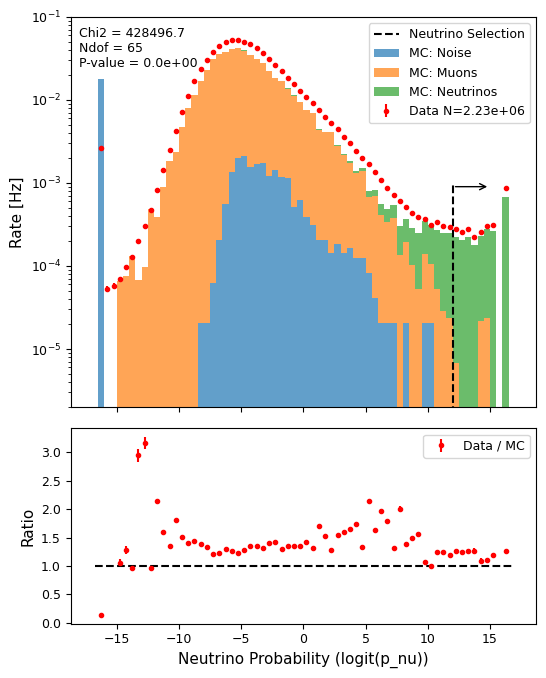

In [23]:

bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2



print(counts_RD_not_rate[:35])
RD_uncertainties_on_count = np.sqrt(counts_RD_not_rate)
print(RD_uncertainties_on_count[:10])
RD_percent_uncertainty_on_count = np.zeros_like(RD_uncertainties_on_count)
RD_uncertainties_on_rate = np.zeros_like(RD_uncertainties_on_count)

for i in range(len(RD_uncertainties_on_count)):
    if RD_uncertainties_on_count[i] == 0:
        RD_uncertainties_on_rate[i] = 0
        RD_percent_uncertainty_on_count[i] = 0
    else:
        RD_percent_uncertainty_on_count[i] = RD_uncertainties_on_count[i]/counts_RD_not_rate[i]
        RD_uncertainties_on_rate[i] = counts_RD[i]*RD_percent_uncertainty_on_count[i]

print(RD_percent_uncertainty_on_count[:10])
print(RD_uncertainties_on_rate[:10])

multiclass_logit_ratio = counts_RD/(counts_noise + counts_muon + counts_neutrino)
multiclass_logit_ratio_uncertainties = multiclass_logit_ratio*RD_percent_uncertainty_on_count

multiclass_logit_residual = counts_RD - (counts_noise + counts_muon + counts_neutrino)
multiclass_logit_chi_2 = 0
for i in range(len(multiclass_logit_residual)):
    if RD_uncertainties_on_rate[i] !=0:
        multiclass_logit_chi_2 += (multiclass_logit_residual[i]/RD_uncertainties_on_rate[i])**2
print(multiclass_logit_chi_2)
multiclass_logit_ndof = len(bins_middle) - 3
print(multiclass_logit_chi_2)
multiclass_logit_p_value = sci.chi2.sf(multiclass_logit_chi_2,multiclass_logit_ndof)
print(multiclass_logit_p_value)

figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

axs[0].bar(bins_middle,counts_noise,width=bin_width,label='MC: Noise',alpha=0.7)
axs[0].bar(bins_middle,counts_muon,width=bin_width,bottom=counts_noise,label='MC: Muons',alpha=0.7)
axs[0].bar(bins_middle,counts_neutrino,width=bin_width,bottom=counts_noise+counts_muon,label='MC: Neutrinos',alpha=0.7)
axs[0].errorbar(x=bins_middle,y=counts_RD,yerr=RD_uncertainties_on_rate,fmt='.',label='Data N={:.2e}'.format(int(np.sum(counts_RD_not_rate))),color='red')
axs[0].vlines(Neutrino_cut,0,10**(-3),color='black',label='Neutrino Selection',linestyles='dashed')

axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1,bottom=2*10**(-6))
#axs[0].set_xlim(-17,17)
axs[0].legend(loc='upper right')
axs[0].annotate("", xy=(Neutrino_cut+3, 0.9*10**(-3)), xytext=(Neutrino_cut, 0.9*10**(-3)),
            arrowprops=dict(arrowstyle="->"))
axs[0].text(-18, 0.025, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}'.format(multiclass_logit_chi_2,multiclass_logit_ndof,multiclass_logit_p_value),fontsize=9)
axs[1].set_xlabel('Neutrino Probability (logit(p_nu))')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,multiclass_logit_ratio,yerr=multiclass_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'multiclass_neutrino_prob_no_scaling.png',bbox_inches='tight',dpi=1200)

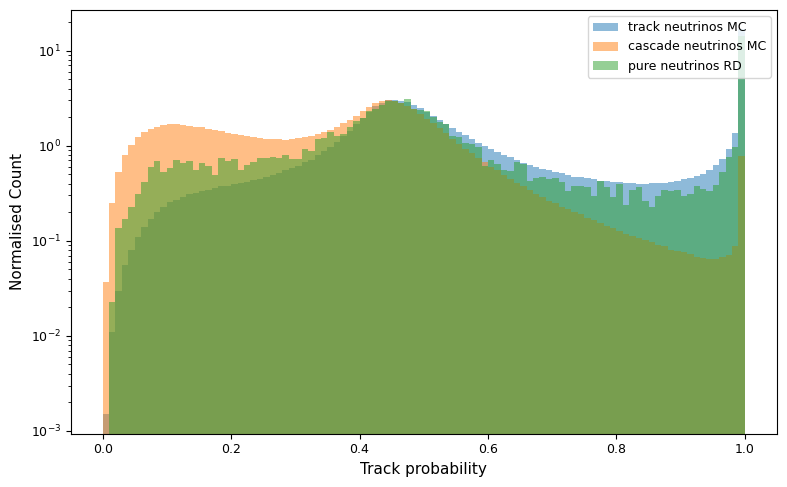

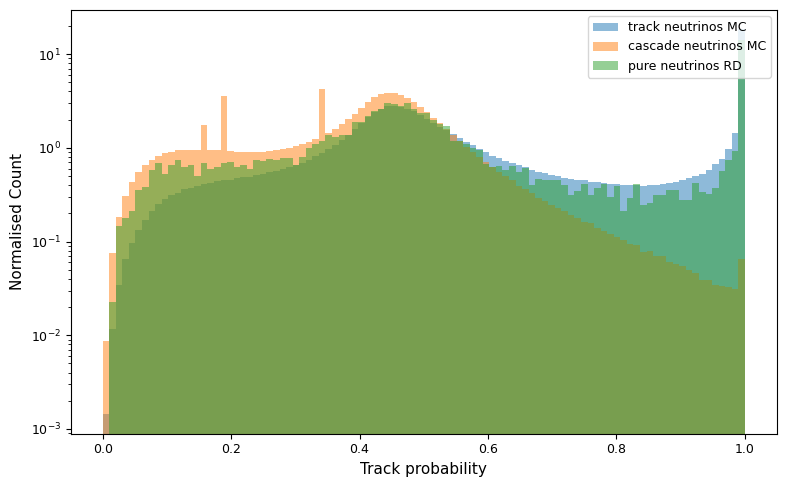

In [24]:
fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,101)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5)#,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,99)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

[1.40848134 0.80449154]
True


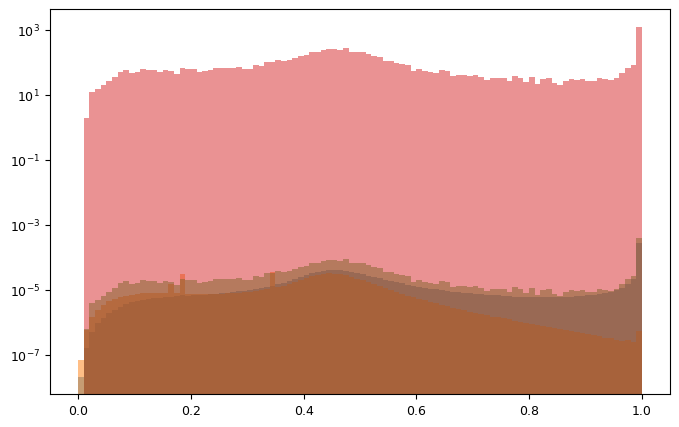

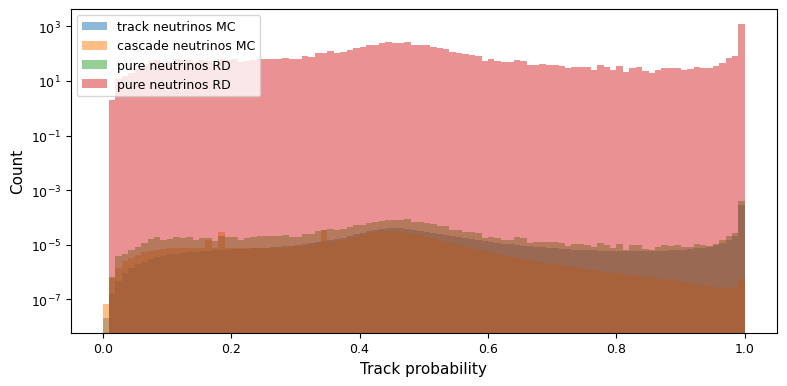

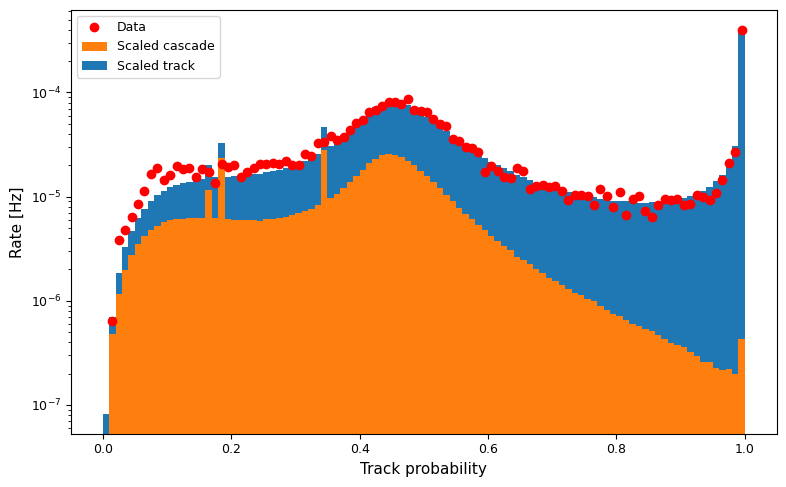

In [25]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = bins_to_use#np.linspace(0.01,0.99,99)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

fig, axs = plt.subplots(figsize=(8, 5))

counts_track_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_fit,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_fit,label='cascade neutrinos MC',alpha=0.5,weights = track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
TC_counts_RD_fit, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])
TC_counts_RD_fit_not_rate, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5)

axs.set_yscale('log')

fig, axs = plt.subplots(figsize=(8, 4))


counts_track, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
TC_counts_RD, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])
TC_counts_RD_not_rate, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5)


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend()

fig.tight_layout()

TC_uncertainty_RD_fit = np.zeros_like(TC_counts_RD_fit_not_rate)
for i in range(len(TC_uncertainty_RD_fit)):
    if TC_counts_RD_fit_not_rate[i]!= 0 :
        TC_uncertainty_RD_fit[i] = (1/np.sqrt(TC_counts_RD_fit_not_rate[i])) * TC_counts_RD_fit[i]

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if TC_counts_RD_fit[i] != 0:
            sum+= (TC_counts_RD_fit[i] - N_scalers[0]*counts_track_fit[i] - N_scalers[1]*counts_cascade_fit[i])**2/TC_uncertainty_RD_fit[i]**2
    return sum

N_0 = [50,50]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None), (0, None)))
print(res.x)
print(res.success)

counts_track_plot = counts_track*res.x[0]#
counts_cascade_plot = counts_cascade*res.x[1]##

bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1')
axs.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0')


axs.plot(bins_middle,TC_counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


In [26]:
track_cut = 0.9
cascade_cut = 0.5
pure_track_event_no_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred']>track_cut)]# & (track_cascade_MC['track_mu_pred'] < track_cut_2) ]
pure_track_event_no_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred']>track_cut)]# & (track_cascade_RD['track_mu_pred'] < track_cut_2)]


pure_cascade_event_no_MC = track_cascade_MC['event_no'][track_cascade_MC['track_mu_pred']<cascade_cut]
pure_cascade_event_no_RD = track_cascade_RD['event_no'][track_cascade_RD['track_mu_pred']<cascade_cut]


pure_track_selection_MC = pure_track_event_no_MC[pure_track_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_track_selection_RD = pure_track_event_no_RD[pure_track_event_no_RD.isin(pure_neutrino_selection_RD)]


pure_cascade_selection_MC = pure_cascade_event_no_MC[pure_cascade_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_cascade_selection_RD = pure_cascade_event_no_RD[pure_cascade_event_no_RD.isin(pure_neutrino_selection_RD)]

print(len(pure_track_selection_MC))
print(len(pure_track_selection_RD))
print(len(pure_cascade_selection_MC))
print(len(pure_cascade_selection_RD))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_track_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_track_selection_RD.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD.to_list())]))

1088620
1628
6161645
4807
0.0003723312764739479
0.0005158926628908901
0.0013101002644342193
0.0015232776600224256


[  0.   2.  12.  15.  20.  27.  36.  52.  60.  46.  51.  62.  58.  60.
  49.  58.  54.  43.  65.  61.  63.  49.  55.  59.  65.  65.  66.  65.
  70.  63.  63.  81.  78. 104. 106.]
[0.         1.41421356 3.46410162 3.87298335 4.47213595 5.19615242
 6.         7.21110255 7.74596669 6.78232998]
[0.         0.70710678 0.28867513 0.25819889 0.2236068  0.19245009
 0.16666667 0.13867505 0.12909944 0.14744196]
[0.00000000e+00 4.48146438e-07 1.09773010e-06 1.22729956e-06
 1.41716347e-06 1.64659515e-06 1.90132431e-06 2.28510743e-06
 2.45459913e-06 2.14923481e-06]
186.4976160167658
186.4976160167658
1.804150457563567e-07


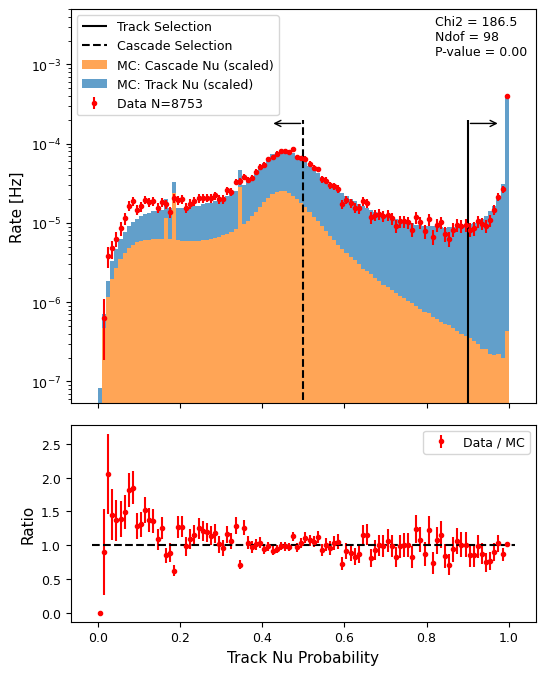

In [27]:
bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

print(TC_counts_RD_not_rate[:35])
TC_RD_uncertainties_on_count = np.sqrt(TC_counts_RD_not_rate)
print(TC_RD_uncertainties_on_count[:10])
TC_RD_percent_uncertainty_on_count = np.zeros_like(TC_RD_uncertainties_on_count)
TC_RD_uncertainties_on_rate = np.zeros_like(TC_RD_uncertainties_on_count)

for i in range(len(TC_RD_uncertainties_on_count)):
    if TC_RD_uncertainties_on_count[i] == 0:
        TC_RD_uncertainties_on_rate[i] = 0
        TC_RD_percent_uncertainty_on_count[i] = 0
    else:
        TC_RD_percent_uncertainty_on_count[i] = TC_RD_uncertainties_on_count[i]/TC_counts_RD_not_rate[i]
        TC_RD_uncertainties_on_rate[i] = TC_counts_RD[i]*TC_RD_percent_uncertainty_on_count[i]

print(TC_RD_percent_uncertainty_on_count[:10])
print(TC_RD_uncertainties_on_rate[:10])

TC_logit_ratio = TC_counts_RD/(counts_track_plot + counts_cascade_plot)
TC_logit_ratio_uncertainties = TC_logit_ratio*TC_RD_percent_uncertainty_on_count

TC_logit_residual = TC_counts_RD - (counts_track_plot + counts_cascade_plot)
TC_logit_chi_2 = 0
for i in range(len(TC_logit_residual)):
    if TC_RD_uncertainties_on_rate[i] !=0:
        TC_logit_chi_2 += (TC_logit_residual[i]/TC_RD_uncertainties_on_rate[i])**2
print(TC_logit_chi_2)
TC_logit_ndof = len(bins_middle)-2
print(TC_logit_chi_2)
TC_logit_p_value = sci.chi2.sf(TC_logit_chi_2,TC_logit_ndof)
print(TC_logit_p_value)








figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs2 = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])


axs2[0].bar(bins_middle,counts_cascade_plot,width=bin_width,label='MC: Cascade Nu (scaled)',color='C1',alpha=0.7)
axs2[0].bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='MC: Track Nu (scaled)',color='C0',alpha=0.7)
axs2[0].errorbar(bins_middle,TC_counts_RD,yerr=TC_RD_uncertainties_on_rate,fmt='.',label='Data N={}'.format(int(np.sum(TC_counts_RD_not_rate))),color='red')
axs2[0].vlines(track_cut,0,2*10**-4,color='black',label='Track Selection')
axs2[0].vlines(cascade_cut,0,2*10**-4,color='black',linestyle='dashed',label='Cascade Selection')

axs2[0].set_ylabel('Rate [Hz]')
axs2[0].set_yscale('log')
axs2[0].legend(loc='upper left')
axs2[0].set_ylim(top=0.5*10**(-2))

axs2[0].text(0.82, 1.3*10**(-3), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(TC_logit_chi_2,TC_logit_ndof,TC_logit_p_value),fontsize=9)

axs2[0].annotate("", xy=(track_cut+0.08, 2*0.9*10**(-4)), xytext=(track_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))
axs2[0].annotate("", xy=(cascade_cut-0.08, 2*0.9*10**(-4)), xytext=(cascade_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))

axs2[1].set_xlabel('Track Nu Probability')
axs2[1].set_ylabel('Ratio')
axs2[1].errorbar(bins_middle,TC_logit_ratio,yerr=TC_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs2[1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
axs2[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'track_probability.png',bbox_inches='tight',dpi=1200)

In [28]:
print(TC_RD_uncertainties_on_rate[:10])
print(np.sqrt(TC_counts_RD[:10]))

[0.00000000e+00 4.48146438e-07 1.09773010e-06 1.22729956e-06
 1.41716347e-06 1.64659515e-06 1.90132431e-06 2.28510743e-06
 2.45459913e-06 2.14923481e-06]
[0.         0.0007961  0.00195004 0.00218021 0.00251749 0.00292506
 0.00337757 0.00405933 0.00436042 0.00381796]


[0.00000000e+00 2.71729778e-05 1.92755071e-06 2.43405819e-06
 3.23162992e-06 4.13170601e-06 5.07019816e-06 6.77427856e-06
 8.49116290e-06 1.09268726e-05]
[0.13007884 1.28194404 1.52852154]
True
[0.00000e+00 7.35300e+03 3.70000e+01 5.90000e+01 1.04000e+02 1.70000e+02
 2.56000e+02 4.57000e+02 7.18000e+02 1.18900e+03 2.19500e+03 3.87500e+03
 6.91100e+03 1.17230e+04 1.96590e+04 3.09670e+04 4.52720e+04 6.26780e+04
 8.10620e+04 9.84340e+04 1.12649e+05 1.21149e+05 1.23905e+05 1.21168e+05
 1.12511e+05 1.01404e+05 8.78450e+04 7.41190e+04 6.07040e+04 4.91660e+04
 3.92850e+04 3.12660e+04 2.46050e+04 1.92500e+04 1.47990e+04]
[ 0.         85.74963557  6.08276253  7.68114575 10.19803903 13.03840481
 16.         21.37755833 26.79552201 34.4818793 ]
[0.         0.01166186 0.16439899 0.13018891 0.09805807 0.0766965
 0.0625     0.04677803 0.03731967 0.02900074]
[0.00000000e+00 2.71729778e-05 1.92755071e-06 2.43405819e-06
 3.23162992e-06 4.13170601e-06 5.07019816e-06 6.77427856e-06
 8.49116290e-06 1.0926

/tmp/ipykernel_34538/2337484461.py:82: RuntimeWarning: divide by zero encountered in divide
  track_only_multiclass_logit_ratio = track_only_counts_RD/(track_only_counts_noise_plot + track_only_counts_muon_plot + track_only_counts_neutrino_plot)
/tmp/ipykernel_34538/2337484461.py:82: RuntimeWarning: invalid value encountered in divide
  track_only_multiclass_logit_ratio = track_only_counts_RD/(track_only_counts_noise_plot + track_only_counts_muon_plot + track_only_counts_neutrino_plot)


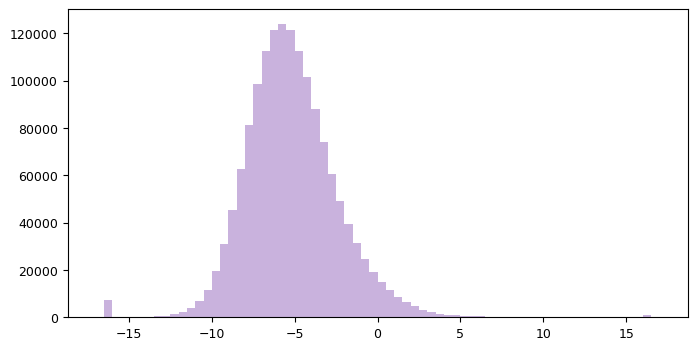

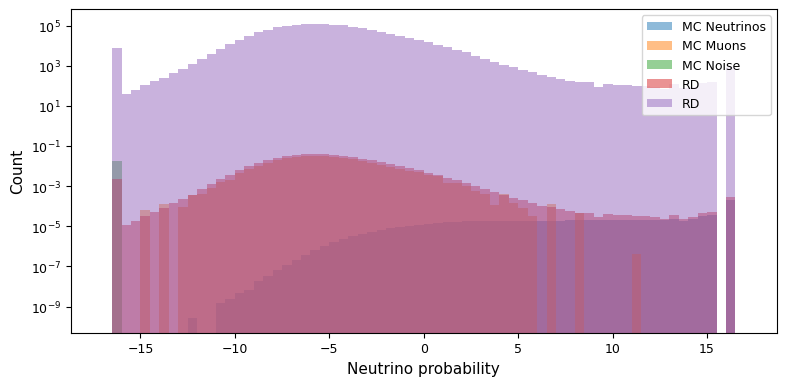

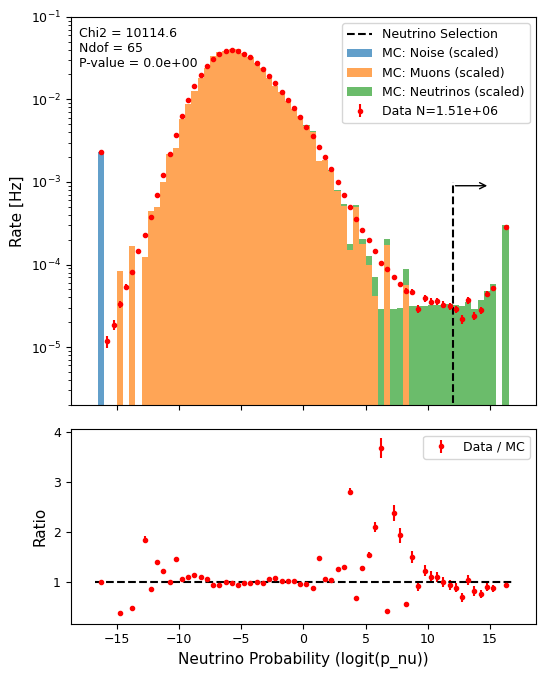

In [29]:
bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = bins_to_use#np.linspace(-17,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
track_only_counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())])
track_only_counts_RD_fit_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='RD')


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

track_only_counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_track_event_no_MC.to_list())])
track_only_counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())])
track_only_counts_RD_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_event_no_RD.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='RD')


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()

track_only_multiclass_uncertainty_RD_fit = np.zeros_like(track_only_counts_RD_fit_not_rate)
for i in range(len(track_only_multiclass_uncertainty_RD_fit)):
    if track_only_counts_RD_fit_not_rate[i]!= 0 :
        track_only_multiclass_uncertainty_RD_fit[i] = (1/np.sqrt(track_only_counts_RD_fit_not_rate[i])) * track_only_counts_RD_fit[i]

print(track_only_multiclass_uncertainty_RD_fit[:10])

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if track_only_counts_RD_fit[i] != 0:
            sum+= (track_only_counts_RD_fit[i] - N_scalers[0]*track_only_counts_noise_fit[i] - N_scalers[1]*track_only_counts_muon_fit[i] - N_scalers[2]*track_only_counts_neutrino_fit[i])**2/track_only_multiclass_uncertainty_RD_fit[i]**2
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

track_only_counts_noise_plot = track_only_counts_noise*res.x[0]#
track_only_counts_muon_plot = track_only_counts_muon*res.x[1]##
track_only_counts_neutrino_plot = track_only_counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]


bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2



print(track_only_counts_RD_not_rate[:35])
track_only_RD_uncertainties_on_count = np.sqrt(track_only_counts_RD_not_rate)
print(track_only_RD_uncertainties_on_count[:10])
track_only_RD_percent_uncertainty_on_count = np.zeros_like(track_only_RD_uncertainties_on_count)
track_only_RD_uncertainties_on_rate = np.zeros_like(track_only_RD_uncertainties_on_count)

for i in range(len(track_only_RD_uncertainties_on_count)):
    if track_only_RD_uncertainties_on_count[i] == 0:
        track_only_RD_uncertainties_on_rate[i] = 0
        track_only_RD_percent_uncertainty_on_count[i] = 0
    else:
        track_only_RD_percent_uncertainty_on_count[i] = track_only_RD_uncertainties_on_count[i]/track_only_counts_RD_not_rate[i]
        track_only_RD_uncertainties_on_rate[i] = track_only_counts_RD[i]*track_only_RD_percent_uncertainty_on_count[i]

print(track_only_RD_percent_uncertainty_on_count[:10])
print(track_only_RD_uncertainties_on_rate[:10])

track_only_multiclass_logit_ratio = track_only_counts_RD/(track_only_counts_noise_plot + track_only_counts_muon_plot + track_only_counts_neutrino_plot)
track_only_multiclass_logit_ratio_uncertainties = track_only_multiclass_logit_ratio*track_only_RD_percent_uncertainty_on_count

track_only_multiclass_logit_residual = track_only_counts_RD - (track_only_counts_noise_plot + track_only_counts_muon_plot + track_only_counts_neutrino_plot)
track_only_multiclass_logit_chi_2 = 0
for i in range(len(track_only_multiclass_logit_residual)):
    if track_only_RD_uncertainties_on_rate[i] !=0:
        track_only_multiclass_logit_chi_2 += (track_only_multiclass_logit_residual[i]/track_only_RD_uncertainties_on_rate[i])**2
print(track_only_multiclass_logit_chi_2)
track_only_multiclass_logit_ndof = len(bins_middle) - 3
print(track_only_multiclass_logit_chi_2)
track_only_multiclass_logit_p_value = sci.chi2.sf(track_only_multiclass_logit_chi_2,track_only_multiclass_logit_ndof)
print(track_only_multiclass_logit_p_value)

figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

axs[0].bar(bins_middle,track_only_counts_noise_plot,width=bin_width,label='MC: Noise (scaled)',alpha=0.7)
axs[0].bar(bins_middle,track_only_counts_muon_plot,width=bin_width,bottom=track_only_counts_noise_plot,label='MC: Muons (scaled)',alpha=0.7)
axs[0].bar(bins_middle,track_only_counts_neutrino_plot,width=bin_width,bottom=track_only_counts_noise_plot+track_only_counts_muon_plot,label='MC: Neutrinos (scaled)',alpha=0.7)
axs[0].errorbar(x=bins_middle,y=track_only_counts_RD,yerr=track_only_RD_uncertainties_on_rate,fmt='.',label='Data N={:.2e}'.format(int(np.sum(track_only_counts_RD_not_rate))),color='red')
axs[0].vlines(Neutrino_cut,0,10**(-3),color='black',label='Neutrino Selection',linestyles='dashed')

axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1,bottom=2*10**(-6))
#axs[0].set_xlim(-17,17)
axs[0].legend(loc='upper right')
axs[0].annotate("", xy=(Neutrino_cut+3, 0.9*10**(-3)), xytext=(Neutrino_cut, 0.9*10**(-3)),
            arrowprops=dict(arrowstyle="->"))
axs[0].text(-18, 0.025, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}'.format(track_only_multiclass_logit_chi_2,track_only_multiclass_logit_ndof,track_only_multiclass_logit_p_value),fontsize=9)
axs[1].set_xlabel('Neutrino Probability (logit(p_nu))')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,track_only_multiclass_logit_ratio,yerr=track_only_multiclass_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'multiclass_neutrino_prob_only_tracks.png',bbox_inches='tight',dpi=1200)

[0.00000000e+00 4.59213448e-06 2.49517377e-06 2.55482778e-06
 2.21821170e-06 2.67014057e-06 2.76256018e-06 2.85198647e-06
 3.12097879e-06 3.45683326e-06]
[2.21144824 1.45483222 1.12650201]
True
[    0.   210.    62.    65.    49.    71.    76.    81.    97.   119.
   141.   166.   253.   326.   504.   798.  1274.  1941.  3042.  4424.
  6531.  9332. 12349. 14927. 16601. 17183. 16457. 15774. 14499. 13050.
 11836. 10824.  9510.  8768.  7902.]
[ 0.         14.49137675  7.87400787  8.06225775  7.          8.42614977
  8.71779789  9.          9.8488578  10.90871211]
[0.         0.06900656 0.12700013 0.12403473 0.14285714 0.11867817
 0.11470787 0.11111111 0.10153462 0.09166985]
[0.00000000e+00 4.59213448e-06 2.49517377e-06 2.55482778e-06
 2.21821170e-06 2.67014057e-06 2.76256018e-06 2.85198647e-06
 3.12097879e-06 3.45683326e-06]
10371.586629356892
10371.586629356892
0.0


/tmp/ipykernel_34538/3838796297.py:82: RuntimeWarning: divide by zero encountered in divide
  cascade_only_multiclass_logit_ratio = cascade_only_counts_RD/(cascade_only_counts_noise_plot + cascade_only_counts_muon_plot + cascade_only_counts_neutrino_plot)
/tmp/ipykernel_34538/3838796297.py:82: RuntimeWarning: invalid value encountered in divide
  cascade_only_multiclass_logit_ratio = cascade_only_counts_RD/(cascade_only_counts_noise_plot + cascade_only_counts_muon_plot + cascade_only_counts_neutrino_plot)


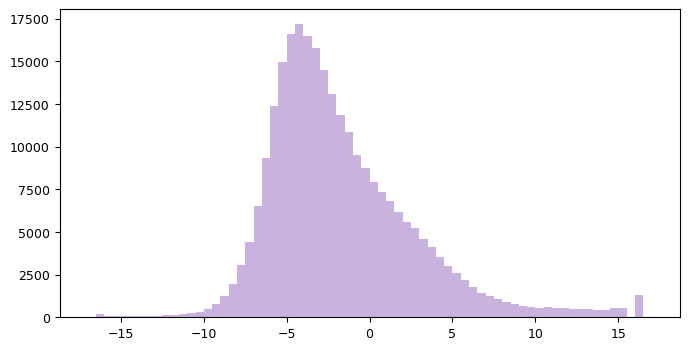

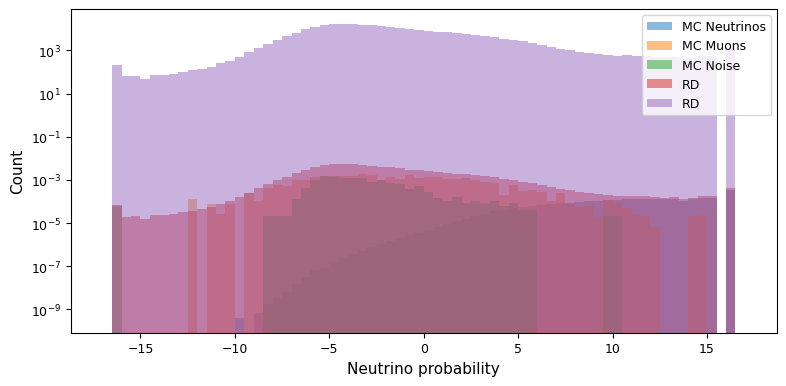

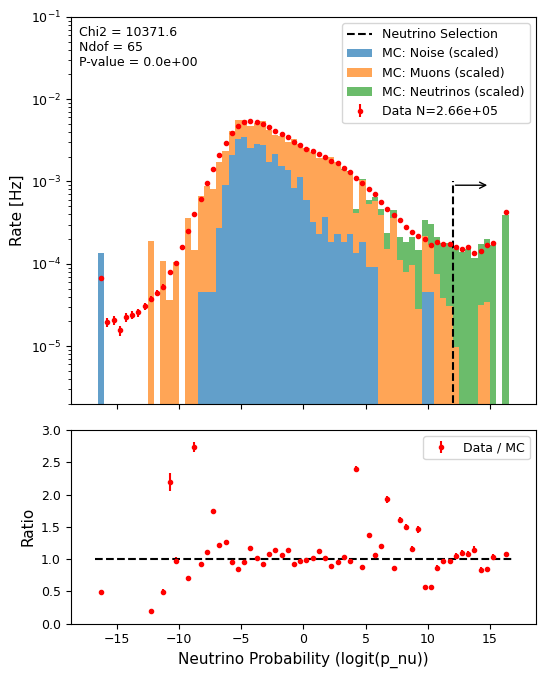

In [30]:
bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = bins_to_use#np.linspace(-17,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
cascade_only_counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())])
cascade_only_counts_RD_fit_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())],bins=bins_to_fit,density=False,alpha=0.5,label='RD')


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

cascade_only_counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-13,13))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][(multiclass_MC['pid'].isin((-1,1))) & multiclass_MC['event_no'].isin(pure_cascade_event_no_MC.to_list())])
cascade_only_counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())])
cascade_only_counts_RD_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_event_no_RD.to_list())],bins=bins_to_use,density=False,alpha=0.5,label='RD')


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()

cascade_only_multiclass_uncertainty_RD_fit = np.zeros_like(cascade_only_counts_RD_fit_not_rate)
for i in range(len(cascade_only_multiclass_uncertainty_RD_fit)):
    if cascade_only_counts_RD_fit_not_rate[i]!= 0 :
        cascade_only_multiclass_uncertainty_RD_fit[i] = (1/np.sqrt(cascade_only_counts_RD_fit_not_rate[i])) * cascade_only_counts_RD_fit[i]

print(cascade_only_multiclass_uncertainty_RD_fit[:10])

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if cascade_only_counts_RD_fit[i] != 0:
            sum+= (cascade_only_counts_RD_fit[i] - N_scalers[0]*cascade_only_counts_noise_fit[i] - N_scalers[1]*cascade_only_counts_muon_fit[i] - N_scalers[2]*cascade_only_counts_neutrino_fit[i])**2/cascade_only_multiclass_uncertainty_RD_fit[i]**2
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

cascade_only_counts_noise_plot = cascade_only_counts_noise*res.x[0]#
cascade_only_counts_muon_plot = cascade_only_counts_muon*res.x[1]##
cascade_only_counts_neutrino_plot = cascade_only_counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]


bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2



print(cascade_only_counts_RD_not_rate[:35])
cascade_only_RD_uncertainties_on_count = np.sqrt(cascade_only_counts_RD_not_rate)
print(cascade_only_RD_uncertainties_on_count[:10])
cascade_only_RD_percent_uncertainty_on_count = np.zeros_like(cascade_only_RD_uncertainties_on_count)
cascade_only_RD_uncertainties_on_rate = np.zeros_like(cascade_only_RD_uncertainties_on_count)

for i in range(len(cascade_only_RD_uncertainties_on_count)):
    if cascade_only_RD_uncertainties_on_count[i] == 0:
        cascade_only_RD_uncertainties_on_rate[i] = 0
        cascade_only_RD_percent_uncertainty_on_count[i] = 0
    else:
        cascade_only_RD_percent_uncertainty_on_count[i] = cascade_only_RD_uncertainties_on_count[i]/cascade_only_counts_RD_not_rate[i]
        cascade_only_RD_uncertainties_on_rate[i] = cascade_only_counts_RD[i]*cascade_only_RD_percent_uncertainty_on_count[i]

print(cascade_only_RD_percent_uncertainty_on_count[:10])
print(cascade_only_RD_uncertainties_on_rate[:10])

cascade_only_multiclass_logit_ratio = cascade_only_counts_RD/(cascade_only_counts_noise_plot + cascade_only_counts_muon_plot + cascade_only_counts_neutrino_plot)
cascade_only_multiclass_logit_ratio_uncertainties = cascade_only_multiclass_logit_ratio*cascade_only_RD_percent_uncertainty_on_count

cascade_only_multiclass_logit_residual = cascade_only_counts_RD - (cascade_only_counts_noise_plot + cascade_only_counts_muon_plot + cascade_only_counts_neutrino_plot)
cascade_only_multiclass_logit_chi_2 = 0
for i in range(len(cascade_only_multiclass_logit_residual)):
    if cascade_only_RD_uncertainties_on_rate[i] !=0:
        cascade_only_multiclass_logit_chi_2 += (cascade_only_multiclass_logit_residual[i]/cascade_only_RD_uncertainties_on_rate[i])**2
print(cascade_only_multiclass_logit_chi_2)
cascade_only_multiclass_logit_ndof = len(bins_middle) - 3
print(cascade_only_multiclass_logit_chi_2)
cascade_only_multiclass_logit_p_value = sci.chi2.sf(cascade_only_multiclass_logit_chi_2,cascade_only_multiclass_logit_ndof)
print(cascade_only_multiclass_logit_p_value)

figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

axs[0].bar(bins_middle,cascade_only_counts_noise_plot,width=bin_width,label='MC: Noise (scaled)',alpha=0.7)
axs[0].bar(bins_middle,cascade_only_counts_muon_plot,width=bin_width,bottom=cascade_only_counts_noise_plot,label='MC: Muons (scaled)',alpha=0.7)
axs[0].bar(bins_middle,cascade_only_counts_neutrino_plot,width=bin_width,bottom=cascade_only_counts_noise_plot+cascade_only_counts_muon_plot,label='MC: Neutrinos (scaled)',alpha=0.7)
axs[0].errorbar(x=bins_middle,y=cascade_only_counts_RD,yerr=cascade_only_RD_uncertainties_on_rate,fmt='.',label='Data N={:.2e}'.format(int(np.sum(cascade_only_counts_RD_not_rate))),color='red')
axs[0].vlines(Neutrino_cut,0,10**(-3),color='black',label='Neutrino Selection',linestyles='dashed')

axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1,bottom=2*10**(-6))
#axs[0].set_xlim(-17,17)
axs[0].legend(loc='upper right')
axs[0].annotate("", xy=(Neutrino_cut+3, 0.9*10**(-3)), xytext=(Neutrino_cut, 0.9*10**(-3)),
            arrowprops=dict(arrowstyle="->"))
axs[0].text(-18, 0.025, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}'.format(cascade_only_multiclass_logit_chi_2,cascade_only_multiclass_logit_ndof,cascade_only_multiclass_logit_p_value),fontsize=9)
axs[1].set_xlabel('Neutrino Probability (logit(p_nu))')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,cascade_only_multiclass_logit_ratio,yerr=cascade_only_multiclass_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].legend()
axs[1].set_ylim(top=3,bottom=0)

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'multiclass_neutrino_prob_only_cascades.png',bbox_inches='tight',dpi=1200)

In [31]:
noise_left = (multiclass_MC['event_no'][(multiclass_MC['pid'].isin((-1,1))) & (multiclass_MC['pid_neutrino_pred_logit'] < -15)]).to_list()
noise_right = (multiclass_MC['event_no'][(multiclass_MC['pid'].isin((-1,1))) & (multiclass_MC['pid_neutrino_pred_logit'] > 0)]).to_list()

print(noise_left[:100])
print(noise_right[:100])

[13355.0, 15489.0, 28041.0, 29379.0, 35191.0, 35916.0, 45126.0, 48241.0, 52777.0, 282080.0, 286733.0, 289627.0, 500382.0, 503710.0, 871644.0, 872596.0, 872850.0, 873031.0, 874992.0, 875137.0, 875509.0, 877107.0, 956210.0, 960185.0, 960840.0, 970434.0, 1248532.0, 1249986.0, 1271338.0, 1271534.0, 1273335.0, 1276348.0, 1287362.0, 1290631.0, 1381321.0, 1388463.0, 1391185.0, 1696976.0, 1699741.0, 1700176.0, 1707344.0, 1711256.0, 1715384.0, 1715807.0, 1851094.0, 1941193.0, 1957872.0, 1959008.0, 1961012.0, 1961192.0, 1961795.0, 1982996.0, 1983100.0, 2025011.0, 2027374.0, 2588782.0, 2589576.0, 2591063.0, 2592201.0, 2592523.0, 2593099.0, 2594240.0, 2595599.0, 2606122.0, 2607959.0, 2610231.0, 2612719.0, 2616357.0, 2617142.0, 2621362.0, 2664040.0, 2669764.0, 2749801.0, 2753125.0, 2755239.0, 2852306.0, 2858117.0, 2862545.0, 2956268.0, 2959038.0, 2959233.0, 3528578.0, 3529331.0, 3532160.0, 3533986.0, 3598590.0, 3647770.0, 3764723.0, 3769463.0, 3771135.0, 3973516.0, 4070970.0, 4071613.0, 4097572.0, 

In [32]:
# print(len(pure_track_selection_MC))
# print(len(pure_track_selection_RD))

# fig, axs = plt.subplots(figsize=(8, 8))

# axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)])
# axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_track_selection_RD)])

# axs.set_xlabel('Neutrino probability')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Count')
# axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()


[  0.   2.  12.  15.  20.  27.  36.  52.  60.  46.  51.  62.  58.  60.
  49.  58.  54.  43.  65.  61.  63.  49.  55.  59.  65.  65.  66.  65.
  70.  63.  63.  81.  78. 104. 106.]
[0.         1.41421356 3.46410162 3.87298335 4.47213595 5.19615242
 6.         7.21110255 7.74596669 6.78232998]
[0.         0.70710678 0.28867513 0.25819889 0.2236068  0.19245009
 0.16666667 0.13867505 0.12909944 0.14744196]
[0.00000000e+00 4.48146438e-07 1.09773010e-06 1.22729956e-06
 1.41716347e-06 1.64659515e-06 1.90132431e-06 2.28510743e-06
 2.45459913e-06 2.14923481e-06]
474.4748205874566
474.4748205874566
9.584895540587024e-51


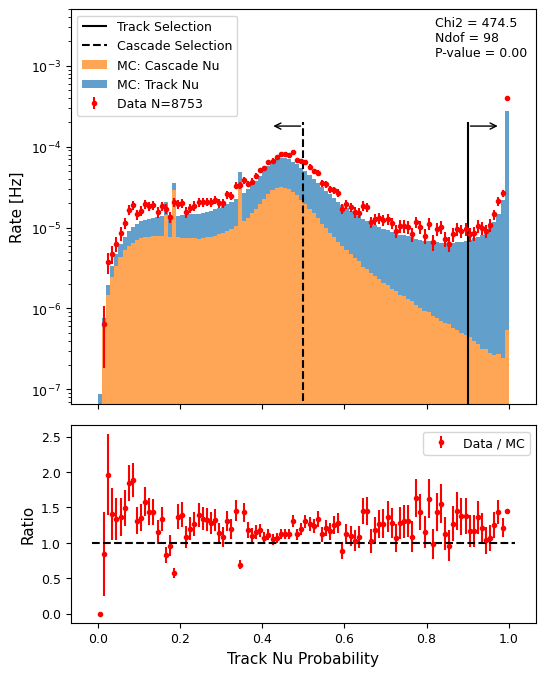

In [33]:
bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

print(TC_counts_RD_not_rate[:35])
TC_RD_uncertainties_on_count = np.sqrt(TC_counts_RD_not_rate)
print(TC_RD_uncertainties_on_count[:10])
TC_RD_percent_uncertainty_on_count = np.zeros_like(TC_RD_uncertainties_on_count)
TC_RD_uncertainties_on_rate = np.zeros_like(TC_RD_uncertainties_on_count)

for i in range(len(TC_RD_uncertainties_on_count)):
    if TC_RD_uncertainties_on_count[i] == 0:
        TC_RD_uncertainties_on_rate[i] = 0
        TC_RD_percent_uncertainty_on_count[i] = 0
    else:
        TC_RD_percent_uncertainty_on_count[i] = TC_RD_uncertainties_on_count[i]/TC_counts_RD_not_rate[i]
        TC_RD_uncertainties_on_rate[i] = TC_counts_RD[i]*TC_RD_percent_uncertainty_on_count[i]

print(TC_RD_percent_uncertainty_on_count[:10])
print(TC_RD_uncertainties_on_rate[:10])

TC_logit_ratio = TC_counts_RD/(counts_track + counts_cascade)
TC_logit_ratio_uncertainties = TC_logit_ratio*TC_RD_percent_uncertainty_on_count

TC_logit_residual = TC_counts_RD - (counts_track + counts_cascade)
TC_logit_chi_2 = 0
for i in range(len(TC_logit_residual)):
    if TC_RD_uncertainties_on_rate[i] !=0:
        TC_logit_chi_2 += (TC_logit_residual[i]/TC_RD_uncertainties_on_rate[i])**2
print(TC_logit_chi_2)
TC_logit_ndof = len(bins_middle)-2
print(TC_logit_chi_2)
TC_logit_p_value = sci.chi2.sf(TC_logit_chi_2,TC_logit_ndof)
print(TC_logit_p_value)








figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs2 = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])


axs2[0].bar(bins_middle,counts_cascade,width=bin_width,label='MC: Cascade Nu',color='C1',alpha=0.7)
axs2[0].bar(bins_middle,counts_track,width=bin_width,bottom=counts_cascade,label='MC: Track Nu',color='C0',alpha=0.7)
axs2[0].errorbar(bins_middle,TC_counts_RD,yerr=TC_RD_uncertainties_on_rate,fmt='.',label='Data N={}'.format(int(np.sum(TC_counts_RD_not_rate))),color='red')
axs2[0].vlines(track_cut,0,2*10**-4,color='black',label='Track Selection')
axs2[0].vlines(cascade_cut,0,2*10**-4,color='black',linestyle='dashed',label='Cascade Selection')

axs2[0].set_ylabel('Rate [Hz]')
axs2[0].set_yscale('log')
axs2[0].legend(loc='upper left')
axs2[0].set_ylim(top=0.5*10**(-2))

axs2[0].text(0.82, 1.3*10**(-3), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(TC_logit_chi_2,TC_logit_ndof,TC_logit_p_value),fontsize=9)

axs2[0].annotate("", xy=(track_cut+0.08, 2*0.9*10**(-4)), xytext=(track_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))
axs2[0].annotate("", xy=(cascade_cut-0.08, 2*0.9*10**(-4)), xytext=(cascade_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))

axs2[1].set_xlabel('Track Nu Probability')
axs2[1].set_ylabel('Ratio')
axs2[1].errorbar(bins_middle,TC_logit_ratio,yerr=TC_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs2[1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
axs2[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'track_probability_unscaled.png',bbox_inches='tight',dpi=1200)

In [34]:
with_MC_truth = True

In [35]:

# fig, ax3 = plt.subplots(figsize=set_size('thesis'))

# bins=np.linspace(0,np.pi*2,100)
# ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax3.set_xlabel('Azimuth (rad)')
# ax3.set_ylabel('Normalised Count')
# ax3.set_ylim(top=0.5)
# ax3.legend(loc='upper left')
# fig.tight_layout()

In [36]:

# fig, ax5 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,0.5,100)
# ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
# ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
# ax5.set_xlabel(r'Azimuth $std_{est}$ (rad)')
# ax5.set_ylim(top=35)
# ax5.set_ylabel('Normalised Count')
# ax5.legend(loc='upper right')
# fig.tight_layout()

In [37]:
# bins=np.linspace(0,np.pi*2,100)
# fig, ax7 = plt.subplots(figsize=set_size('thesis'))

# bins=np.linspace(0,np.pi*2,100)
# ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
# ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
# ax7.set_ylim(top=1.65)
# ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
# ax7.set_ylabel('Normalised Count')
# ax7.legend(loc='upper left')
# fig.tight_layout()

In [38]:

# fig, ax9 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,np.pi,100)
# ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax9.set_xlabel('Zenith (rad)')
# ax9.set_ylim(top=1.5)
# ax9.set_ylabel('Normalised Count')
# ax9.legend(loc='upper left')
# fig.tight_layout()

# bins=np.linspace(0,np.pi,100)
# fig, axs = plt.subplots(figsize=(8, 5))

# axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# #axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection',bins=bins,alpha=0.5)

# axs.set_xlabel('Zenith')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Normalised Count')
# #axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()


In [39]:

# fig, ax11 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,0.3,100)
# ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
# ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
# ax11.set_xlabel(r'Zenith $std_{est}$ (rad)')
# ax11.set_ylabel('Normalised Count')
# ax11.set_ylim(top=80)
# ax11.legend(loc='upper right')
# fig.tight_layout()

In [40]:

# fig, ax4 = plt.subplots(figsize=set_size('thesis'))

# bins=np.linspace(0,np.pi*2,100)
# ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax4.set_xlabel('Azimuth (rad)')
# ax4.set_ylabel('Normalised Count')
# ax4.set_ylim(top=0.5)
# ax4.legend(loc='upper left')
# fig.tight_layout()

In [41]:

# fig, ax6 = plt.subplots(figsize=set_size('thesis'))

# bins=np.linspace(0,4,100)
# ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
# ax6.set_xlabel(r'Azimuth $std_{est}$ (rad)')
# ax6.set_ylim(top=1.7)
# ax6.set_ylabel('Normalised Count')
# ax6.legend(loc='upper right')
# fig.tight_layout()

In [42]:

# fig, ax8 = plt.subplots(figsize=set_size('thesis'))

# bins=np.linspace(0,np.pi*2,100)
# ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax8.set_ylim(top=1.3)
# ax8.set_xlabel(r'Energy ($log_{10}$ GeV)')
# ax8.set_ylabel('Normalised Count')
# ax8.legend(loc='upper right')
# fig.tight_layout()

In [43]:
# bins=np.linspace(0,np.pi,100)
# fig, ax10 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,np.pi,100)
# ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
# if with_MC_truth:
#     ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax10.set_ylim(top=1.5)
# ax10.set_xlabel('Zenith (rad)')
# ax10.set_ylabel('Normalised Count')
# ax10.legend(loc='upper left')
# fig.tight_layout()

# bins=np.linspace(0,np.pi,100)
# fig, axs = plt.subplots(figsize=(8, 5))

# axs.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# #axs.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=False,label='MC cascade neutrino selection truth',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# axs.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,label='RD cascade neutrino selection',bins=bins,alpha=0.5)

# axs.set_xlabel('Zenith')
# #axs.set_ylim(bottom=1000)
# axs.set_ylabel('Normalised Count')
# #axs.set_yscale('log')
# axs.legend(loc='upper left')

# fig.tight_layout()

In [44]:

# fig, ax12 = plt.subplots(figsize=set_size('thesis'))
# bins=np.linspace(0,0.8,100)
# ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
# ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
# ax12.set_xlabel(r'Zenith $std_{est}$ (rad)')
# ax12.set_ylim(top=4.8)
# ax12.set_ylabel('Normalised Count')
# ax12.legend(loc='upper right')
# fig.tight_layout()

In [45]:
from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [46]:

print(pure_track_selection_MC.head(10).to_list())
print(pure_track_selection_RD.head(100).to_list())
print(pure_cascade_selection_MC.head(10).to_list())
print(pure_cascade_selection_RD.head(100).to_list())

[33465.0, 33514.0, 33977.0, 34022.0, 35624.0, 36312.0, 36544.0, 36627.0, 36771.0, 36954.0]
[190659.0, 257306.0, 281585.0, 546451.0, 766134.0, 768559.0, 778239.0, 855035.0, 862137.0, 877631.0, 980469.0, 1064781.0, 1163845.0, 1286386.0, 1319458.0, 1413381.0, 1510775.0, 1526438.0, 1551702.0, 1601921.0, 1646703.0, 1678803.0, 1688494.0, 1779161.0, 1875629.0, 1896399.0, 1905885.0, 1923400.0, 1924645.0, 1928131.0, 1937753.0, 2032968.0, 2038067.0, 2082674.0, 2098465.0, 2227572.0, 2272998.0, 2274907.0, 2283657.0, 2471836.0, 2472797.0, 2498367.0, 2514939.0, 2558994.0, 2729541.0, 2758631.0, 3003407.0, 3006384.0, 3013705.0, 3018733.0, 3092363.0, 3112709.0, 3133746.0, 3204002.0, 3245831.0, 3305439.0, 3411773.0, 3466684.0, 3519503.0, 3563140.0, 3738302.0, 3828070.0, 3907251.0, 3950041.0, 3997888.0, 4040191.0, 4099695.0, 4189492.0, 4413229.0, 4530963.0, 4558291.0, 4847346.0, 5093545.0, 5095709.0, 5181263.0, 5189343.0, 5439633.0, 5483789.0, 5535310.0, 5557008.0, 5559309.0, 5638994.0, 5775016.0, 583090

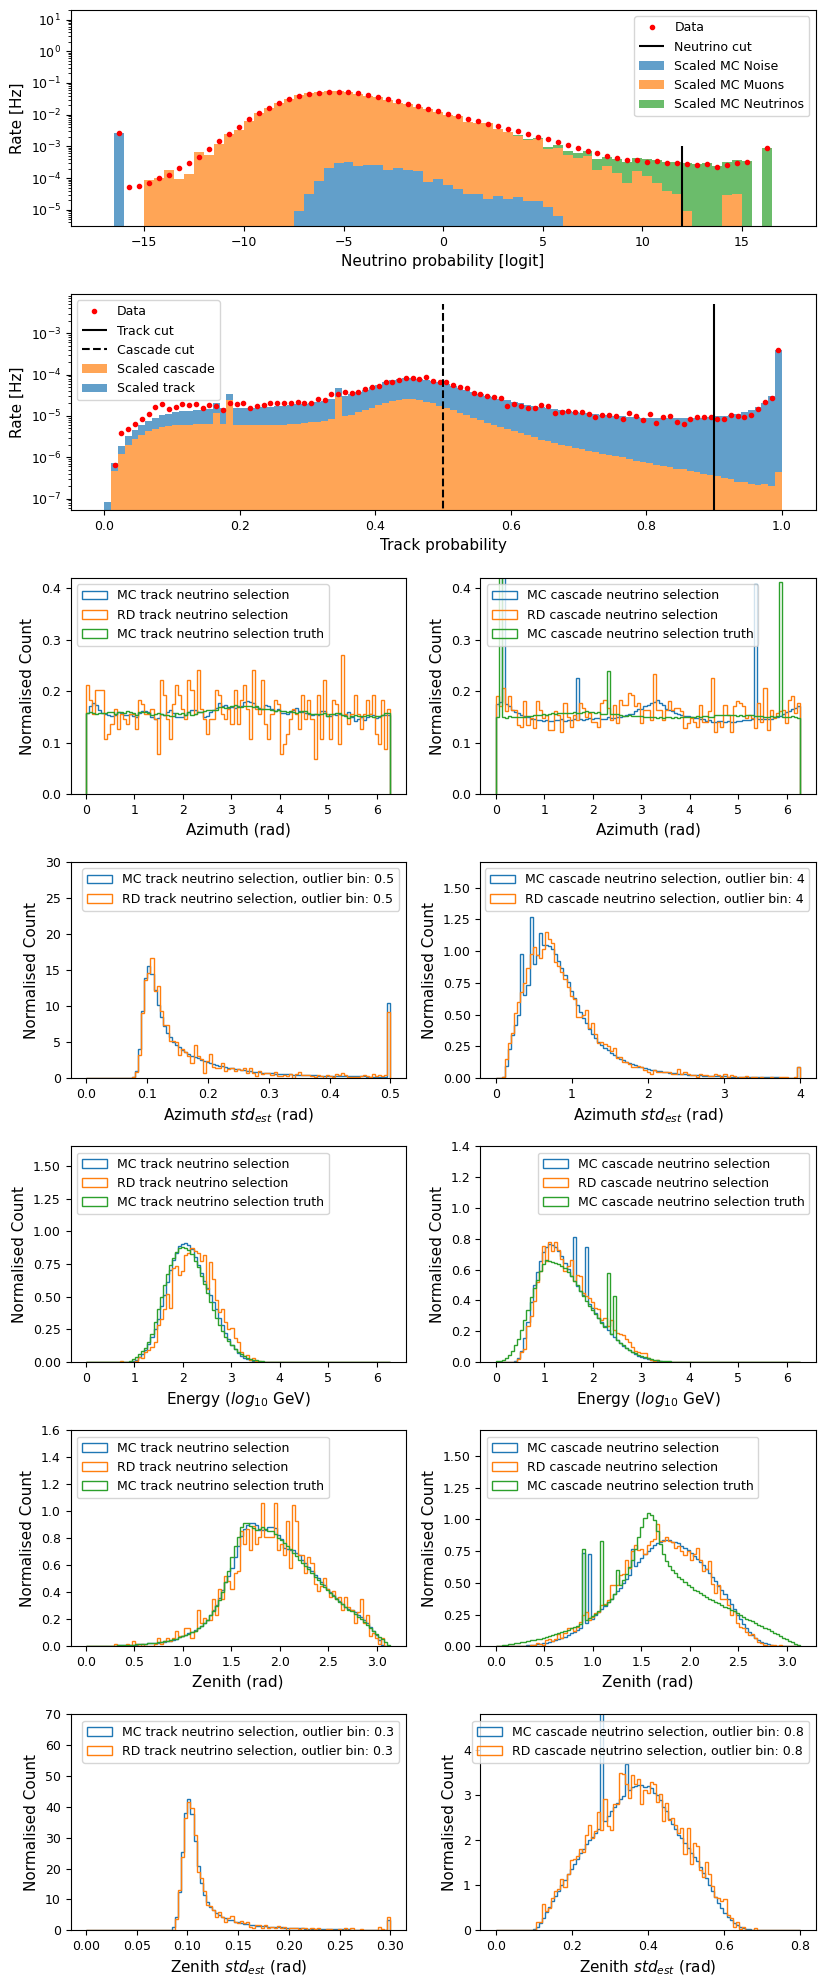

In [47]:
with_MC_truth = True


bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

fig = plt.figure(figsize=set_size('thesis',subplots=(7,2),fraction=1.5,y_size=20))
ax1 = plt.subplot2grid(shape=(7,2), loc=(0,0), colspan=2, fig=fig)
ax1.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled MC Noise',alpha=0.7)
ax1.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled MC Muons',alpha=0.7)
ax1.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled MC Neutrinos',alpha=0.7)
ax1.plot(bins_middle,counts_RD,'.',label='Data',color='red')
ax1.vlines(Neutrino_cut,0,0.001,color='black',label='Neutrino cut')
ax1.set_xlabel('Neutrino probability [logit]')
ax1.set_ylabel('Rate [Hz]')
ax1.set_yscale('log')
ax1.set_ylim(top=20)
ax1.legend(loc='upper right')


bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]
ax2 = plt.subplot2grid((7,2), (1,0), colspan=2)
ax2.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1',alpha=0.7)
ax2.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0',alpha=0.7)
ax2.plot(bins_middle,TC_counts_RD,'.',label='Data',color='red')
ax2.vlines(track_cut,0,5*10**-3,color='black',label='Track cut')
ax2.vlines(cascade_cut,0,5*10**-3,color='black',linestyle='dashed',label='Cascade cut')
ax2.set_xlabel('Track probability')
ax2.set_ylabel('Rate [Hz]')
ax2.set_yscale('log')
ax2.legend(loc='upper left')

bins=np.linspace(0,np.pi*2,100)
ax3 = plt.subplot2grid((7,2), (2,0), colspan=1)
ax3.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax3.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax3.set_xlabel('Azimuth (rad)')
ax3.set_ylabel('Normalised Count')
ax3.set_ylim(top=0.42)
ax3.legend(loc='upper left')

ax4 = plt.subplot2grid((7,2), (2,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax4.hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax4.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax4.set_xlabel('Azimuth (rad)')
ax4.set_ylabel('Normalised Count')
ax4.set_ylim(top=0.42)
ax4.legend(loc='upper left')

ax5 = plt.subplot2grid((7,2), (3,0), colspan=1)
bins=np.linspace(0,0.5,100)
ax5.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
ax5.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
ax5.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax5.set_ylim(top=30)
ax5.set_ylabel('Normalised Count')
ax5.legend(loc='upper right')


ax6 = plt.subplot2grid((7,2), (3,1), colspan=1)
bins=np.linspace(0,4,100)
ax6.hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
ax6.hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
ax6.set_xlabel(r'Azimuth $std_{est}$ (rad)')
ax6.set_ylim(top=1.7)
ax6.set_ylabel('Normalised Count')
ax6.legend(loc='upper right')

ax7 = plt.subplot2grid((7,2), (4,0), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax7.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax7.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
ax7.set_ylim(top=1.65)
ax7.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax7.set_ylabel('Normalised Count')
ax7.legend(loc='upper left')


ax8 = plt.subplot2grid((7,2), (4,1), colspan=1)
bins=np.linspace(0,np.pi*2,100)
ax8.hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax8.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
ax8.set_ylim(top=1.4)
ax8.set_xlabel(r'Energy ($log_{10}$ GeV)')
ax8.set_ylabel('Normalised Count')
ax8.legend(loc='upper right')



ax9 = plt.subplot2grid((7,2), (5,0), colspan=1)
bins=np.linspace(0,np.pi,100)
ax9.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax9.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax9.set_xlabel('Zenith (rad)')
ax9.set_ylim(top=1.6)
ax9.set_ylabel('Normalised Count')
ax9.legend(loc='upper left')



ax10 = plt.subplot2grid((7,2), (5,1), colspan=1)
bins=np.linspace(0,np.pi,100)
ax10.hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    ax10.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax10.set_ylim(top=1.7)
ax10.set_xlabel('Zenith (rad)')
ax10.set_ylabel('Normalised Count')
ax10.legend(loc='upper left')


ax11 = plt.subplot2grid((7,2), (6,0), colspan=1)
bins=np.linspace(0,0.3,100)
ax11.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
ax11.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
ax11.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax11.set_ylabel('Normalised Count')
ax11.set_ylim(top=70)
ax11.legend(loc='upper right')

ax12 = plt.subplot2grid((7,2), (6,1), colspan=1)
bins=np.linspace(0,0.8,100)
ax12.hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
ax12.hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
ax12.set_xlabel(r'Zenith $std_{est}$ (rad)')
ax12.set_ylim(top=4.8)
ax12.set_ylabel('Normalised Count')
ax12.legend(loc='upper right')


fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'Track_cascade_whole_analysis.png',bbox_inches='tight')

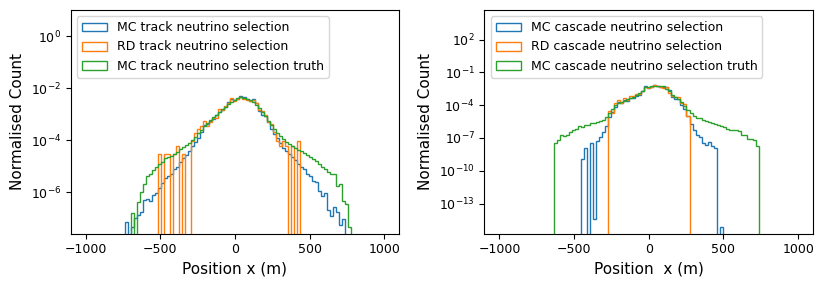

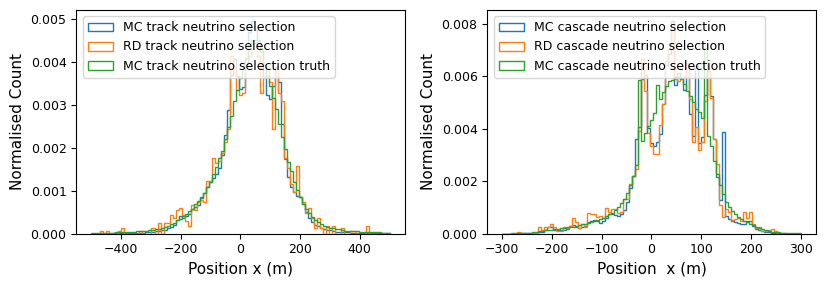

In [48]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1000,1000,100)

axs[0].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position x (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=10)
axs[0].legend(loc='upper left')


bins=np.linspace(-1000,1000,100)
axs[1].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  x (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_x_track_cascade.png',bbox_inches='tight')



fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-500,500,100)

axs[0].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position x (m)')
axs[0].set_ylabel('Normalised Count')

#axs[0].set_ylim(top=10)
axs[0].legend(loc='upper left')


bins=np.linspace(-300,300,100)
axs[1].hist(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  x (m)')
axs[1].set_ylabel('Normalised Count')

#axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_x_track_cascade_not_log.png',bbox_inches='tight')

In [49]:
def uncertainties_from_counts_rates(counts,rates):
    uncertainties = np.zeros(len(counts))
    fractional_uncertainty = np.zeros(len(counts))
    for i in range(len(uncertainties)):
        if counts[i]!=0:
            uncertainties[i] = 1/np.sqrt(counts[i]) * rates[i]
            fractional_uncertainty[i] = 1/np.sqrt(counts[i])
    #print(uncertainties)
    return uncertainties,fractional_uncertainty

def chi2_calculation(MC_rates,RD_rates,RD_uncertainties,parameters=1):
    chi2 = 0
    ndof = len(MC_rates)-parameters
    for i in range(len(RD_rates)):
        if RD_rates[i]!=0 and MC_rates[i]!=0:
            chi2 += (RD_rates[i]-MC_rates[i])**2/RD_uncertainties[i]**2
    p_value = sci.chi2.sf(chi2,ndof)

    return chi2,ndof,p_value

scale = True
if scale == True:
    scale_track = np.sum(azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])/np.sum(azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
    print(scale_track)
    scale_cascade = np.sum(azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])/np.sum(azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
    print(scale_cascade)
else:
    scale_track = 1
    scale_cascade = 1
# rates = np.array([6.97152247*10**(-6), 6.02086032*10**(-6)])
# counts = np.array([22,14])
# print(uncertainties_from_counts_rates(counts,rates))

1.3855743406154255
1.1627183822302862


103.38393450659146 79 0.03424308818625061
760.5700345849267 99 1.2611765045939196e-102


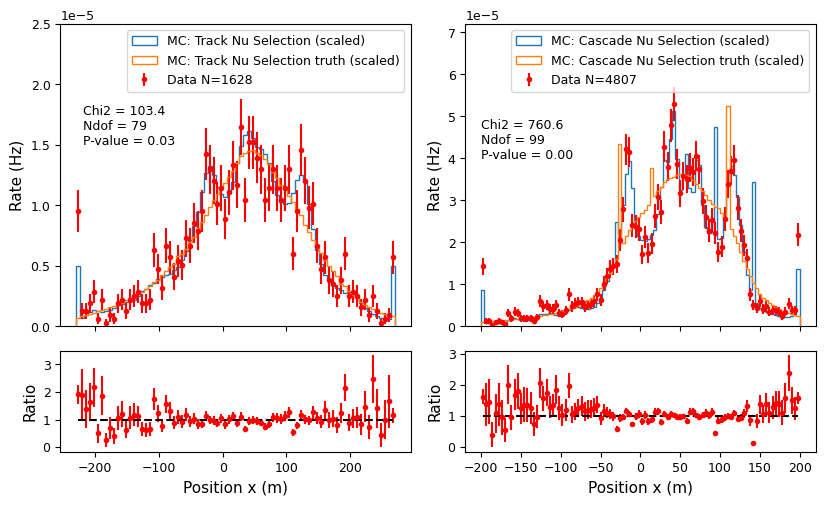

In [50]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-230,270,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-230,270),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-230,270),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-230,270), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position x (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=2.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(-220, 1.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-200,200,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-200,200),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-200,200),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-200,200), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position x (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=7.2*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(-200, 4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_x_track_cascade_rate_ratio.png',bbox_inches='tight')

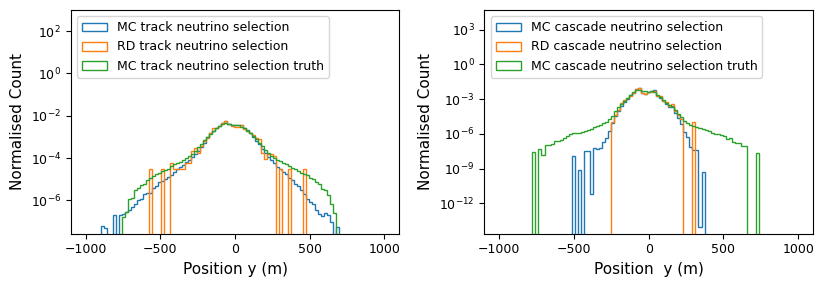

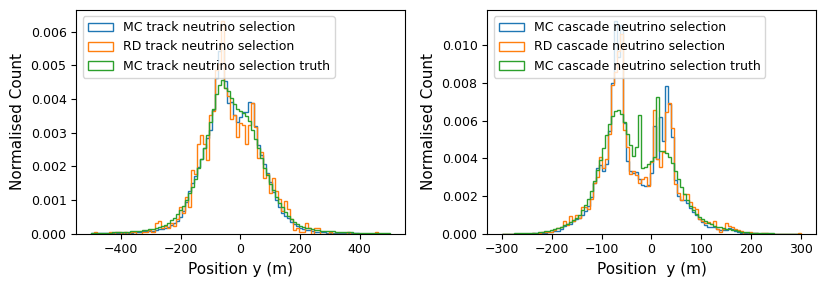

In [51]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1000,1000,100)

axs[0].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position y (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=1000)
axs[0].legend(loc='upper left')


bins=np.linspace(-1000,1000,100)
axs[1].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  y (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_y_track_cascade.png',bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-500,500,100)

axs[0].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position y (m)')
axs[0].set_ylabel('Normalised Count')
# axs[0].set_yscale('log')
# axs[0].set_ylim(top=1000)
axs[0].legend(loc='upper left')


bins=np.linspace(-300,300,100)
axs[1].hist(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  y (m)')
axs[1].set_ylabel('Normalised Count')
# axs[1].set_yscale('log')
# axs[1].set_ylim(top=50000)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_y_track_cascade_not_log.png',bbox_inches='tight')

91.38257731713615 79 0.16101545333039557
288.2605815971989 99 2.201265050784343e-20


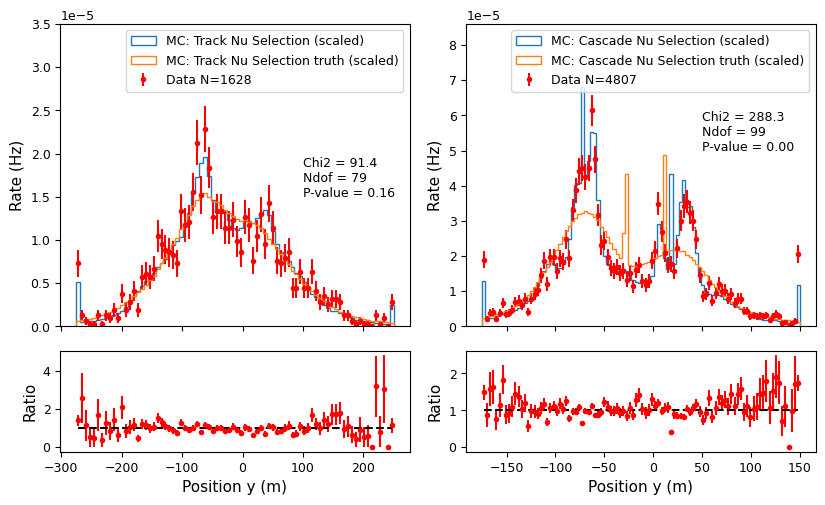

In [52]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-275,250,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-275,250),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-275,250),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-275,250), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position y (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=3.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(100, 1.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-175,150,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-175,150),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-175,150),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-175,150), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position y (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=8.6*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(50, 5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_y_track_cascade_rate_ratio.png',bbox_inches='tight')

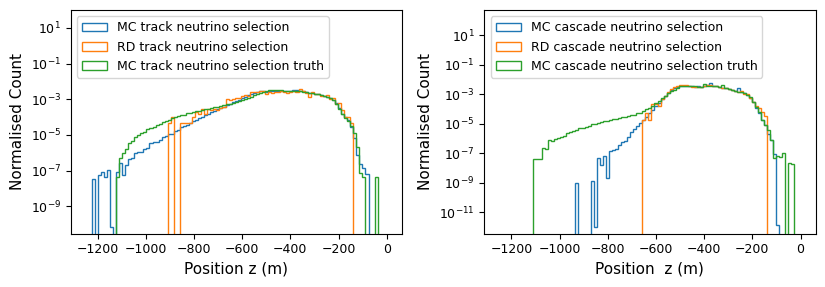

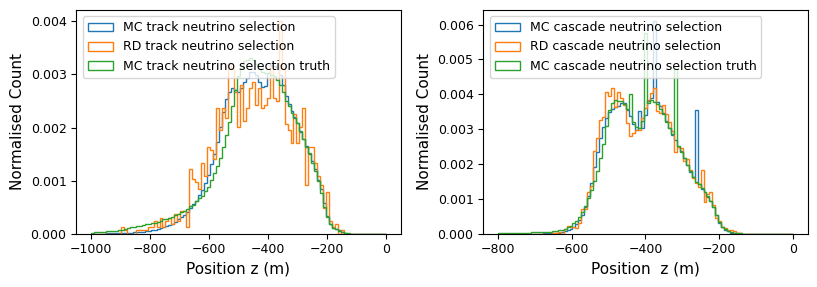

In [53]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1250,0,100)

axs[0].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position z (m)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=100)
axs[0].legend(loc='upper left')


bins=np.linspace(-1250,0,100)
axs[1].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  z (m)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=500)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_z_track_cascade.png',bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(-1000,0,100)

axs[0].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Position z (m)')
axs[0].set_ylabel('Normalised Count')
# axs[0].set_yscale('log')
# axs[0].set_ylim(top=100)
axs[0].legend(loc='upper left')


bins=np.linspace(-800,0,100)
axs[1].hist(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Position  z (m)')
axs[1].set_ylabel('Normalised Count')
# axs[1].set_yscale('log')
# axs[1].set_ylim(top=500)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_z_track_cascade_not_log.png',bbox_inches='tight')

106.71528858656467 79 0.020609946240630103
401.3549706445364 99 5.005137277539323e-38


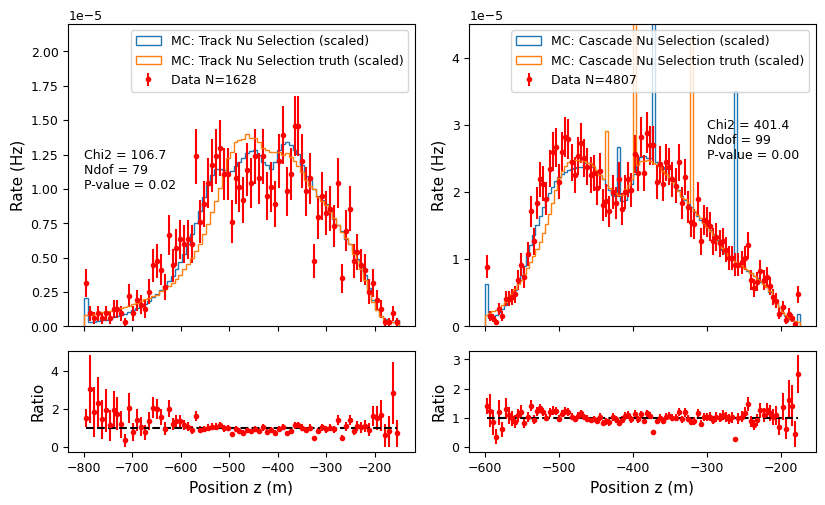

In [54]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-800,-150,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-800,-150),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-800,-150),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-800,-150), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position z (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=2.2*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(-800, 1*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-600,-175,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-600,-175),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-600,-175),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-600,-175), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position z (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=4.5*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(-300, 2.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'position_z_track_cascade_rate_ratio.png',bbox_inches='tight')

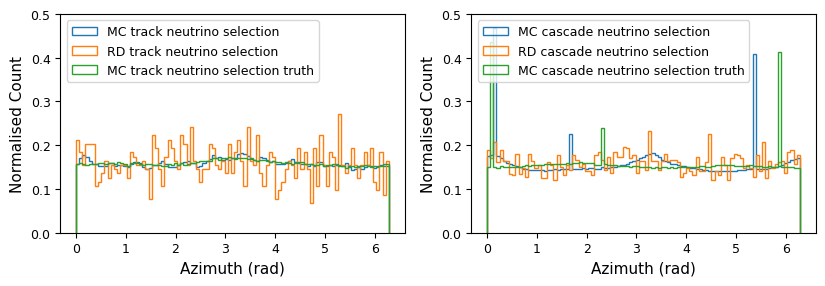

In [55]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi*2,100)

axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)], histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Azimuth (rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_ylim(top=0.5)
axs[0].legend(loc='upper left')


bins=np.linspace(0,np.pi*2,100)
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_xlabel('Azimuth (rad)')
axs[1].set_ylabel('Normalised Count')
axs[1].set_ylim(top=0.5)
axs[1].legend(loc='upper left')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'azimuth_track_cascade.png',bbox_inches='tight')




29.655735369401327 29 0.43133461222495906
224.06473389647394 49 3.2001636493513275e-24


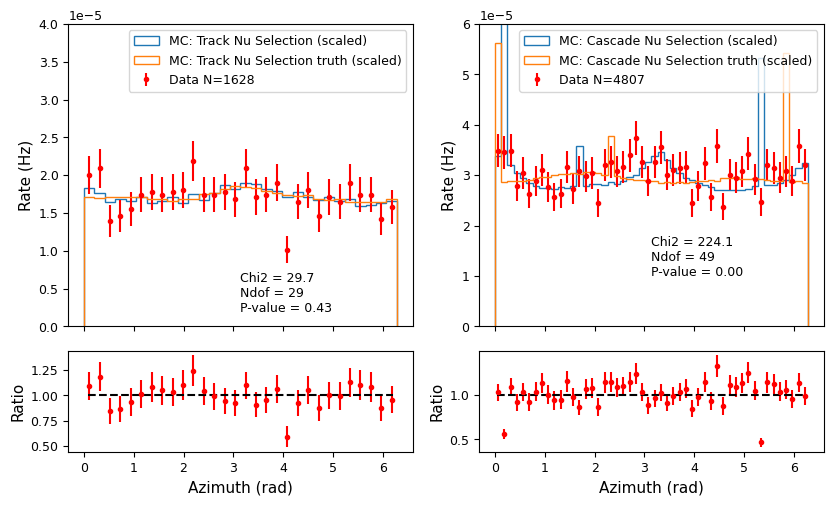

In [56]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

bins=np.linspace(0,np.pi*2,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel('Azimuth (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(np.pi, 0.2*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

bins=np.linspace(0,np.pi*2,51)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel('Azimuth (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=6*10**(-5))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(np.pi, 1*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'azimuth_track_cascade_rate_ratio.png',bbox_inches='tight')

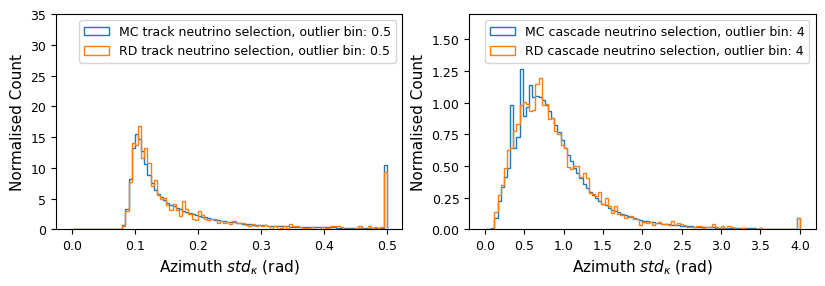

In [57]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,0.5,101)
axs[0].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.5',bins=bins,alpha=1)
axs[0].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0].set_ylim(top=35)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')


bins=np.linspace(0,4,101)
axs[1].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,4), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,4), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 4',bins=bins,alpha=1)
axs[1].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[1].set_ylim(top=1.7)
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'azimuth_kappa_track_cascade.png',bbox_inches='tight')

29.0167037343175 29 0.4641965027285355
47.0804213467182 29 0.01826982486273671


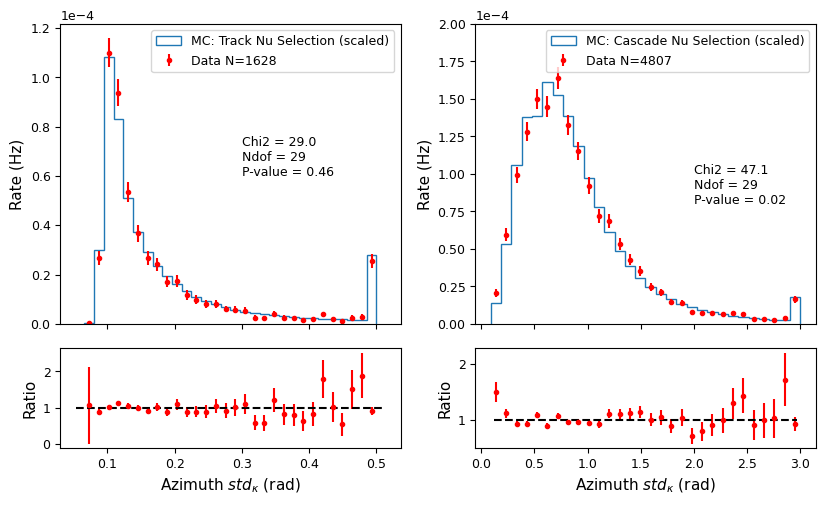

In [58]:


figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.5,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
#axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.3, 0.00006, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),3,31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,3),density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,3),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,3), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=0.0002)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(2, 0.00008, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'azimuth_kappa_track_cascade_rate_ratio.png',bbox_inches='tight')

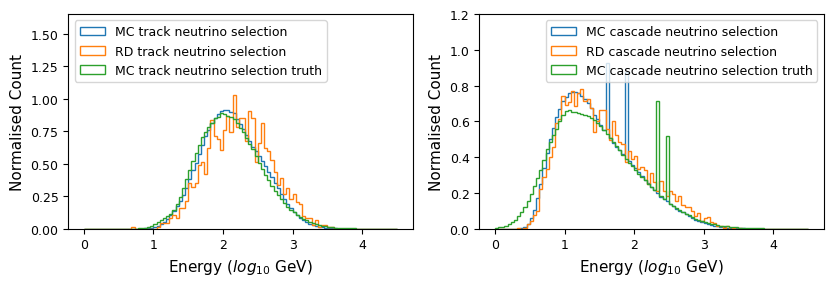

In [59]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))



bins=np.linspace(0,4.5,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_ylim(top=1.65)
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper left')


bins=np.linspace(0,4.5,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_ylim(top=1.2)
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'energy_track_cascade.png',bbox_inches='tight')

101.45338086180216 29 5.719379345250288e-10
141.9201712933821 29 7.899440467666883e-17


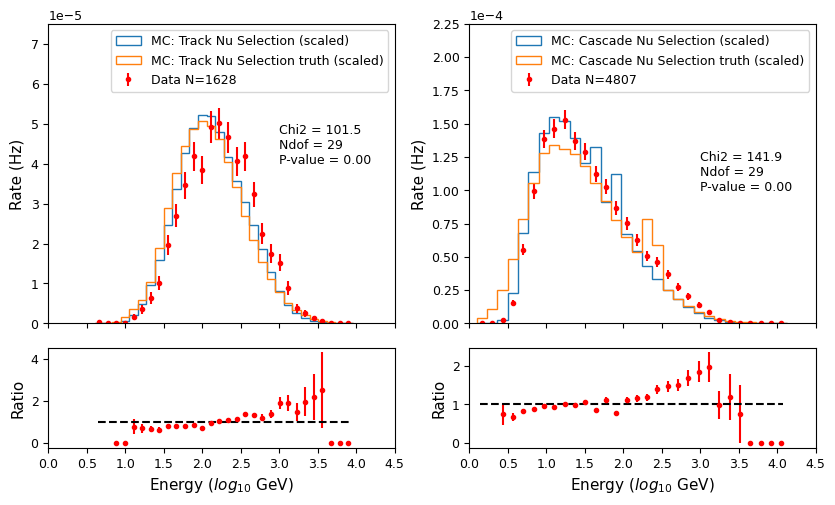

In [60]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

track_max_MC = np.max(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]))
track_max_RD = np.max(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
track_min_MC = np.min(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]))
track_min_RD = np.min(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
bins=np.linspace(np.min([track_min_MC,track_min_RD]),np.max([track_max_MC,track_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),density=False,bins=bins,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=7.5*10**(-5))
axs[0,0].set_xlim(0,4.5)
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle[2:],track_ratio[2:],yerr=track_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(3, 4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_max_MC = np.max(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]))
cascade_max_RD = np.max(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
cascade_min_MC = np.min(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]))
cascade_min_RD = np.min(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
bins=np.linspace(np.min([cascade_min_MC,cascade_min_RD]),np.max([cascade_max_MC,cascade_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),density=False,bins=bins,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=0.000225)
axs[0,1].set_xlim(0,4.5)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle[2:],cascade_ratio[2:],yerr=cascade_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(3, 0.0001, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'energy_track_cascade_rate_ratio.png',bbox_inches='tight')

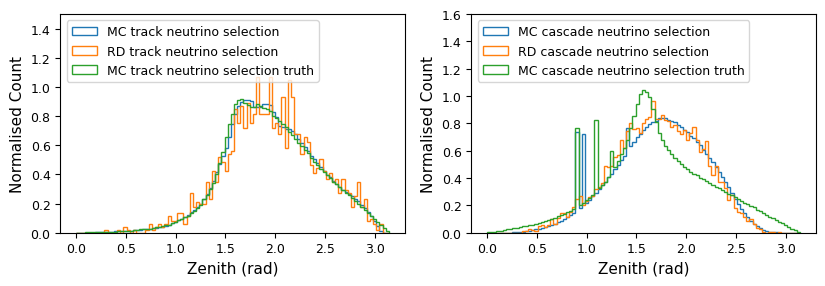

In [61]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))


bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],  histtype='step',density=True,label='RD track neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)],  histtype='step',density=True,label='MC track neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].set_xlabel('Zenith (rad)')
axs[0].set_ylim(top=1.5)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper left')


bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],  histtype='step',density=True,label='RD cascade neutrino selection',bins=bins,alpha=1)
if with_MC_truth:
    axs[1].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],  histtype='step',density=True,label='MC cascade neutrino selection truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].set_ylim(top=1.6)
axs[1].set_xlabel('Zenith (rad)')
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper left')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'zenith_track_cascade.png',bbox_inches='tight')

22.449950004369384 29 0.8010922437464026
257.59615463313133 29 1.7047850525696726e-38


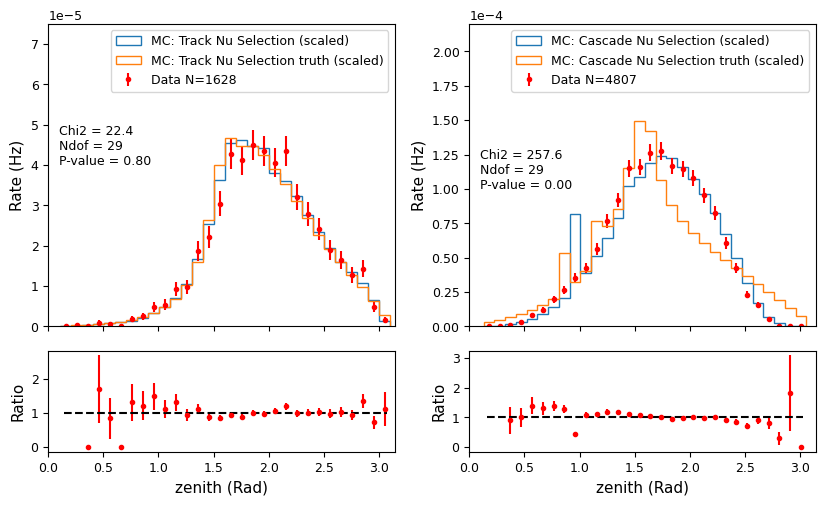

In [62]:
figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

track_max_MC = np.max(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
track_max_RD = np.max(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_min_MC = np.min(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
track_min_RD = np.min(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
bins=np.linspace(np.min([track_min_MC,track_min_RD]),np.max([track_max_MC,track_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel(r'zenith (Rad)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=7.5*10**(-5))
axs[0,0].set_xlim(0,np.pi)
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle[2:],track_ratio[2:],yerr=track_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.1,4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_max_MC = np.max(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
cascade_max_RD = np.max(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_min_MC = np.min(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
cascade_min_RD = np.min(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
bins=np.linspace(np.min([cascade_min_MC,cascade_min_RD]),np.max([cascade_max_MC,cascade_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel(r'zenith (Rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=2.2*10**(-4))
axs[0,1].set_xlim(0,np.pi)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle[2:],cascade_ratio[2:],yerr=cascade_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(0.1,1*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'zenith_track_cascade_rate_ratio.png',bbox_inches='tight')

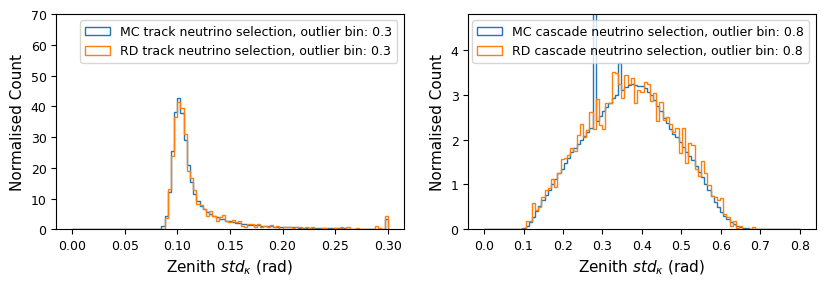

In [63]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,0.3,100)
axs[0].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=True,label='MC track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
axs[0].hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3), histtype='step',density=True,label='RD track neutrino selection, outlier bin: 0.3',bins=bins,alpha=1)
axs[0].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0].set_ylim(top=70)
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')


bins=np.linspace(0,0.8,100)
axs[1].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.8), histtype='step',density=True,label='MC cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.8), histtype='step',density=True,label='RD cascade neutrino selection, outlier bin: 0.8',bins=bins,alpha=1)
axs[1].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[1].set_ylim(top=4.8)
axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'zenith_kappa_track_cascade.png',bbox_inches='tight')


17.691249423445374 29 0.950322946230734
120.3489013112264 29 4.294866697567117e-13


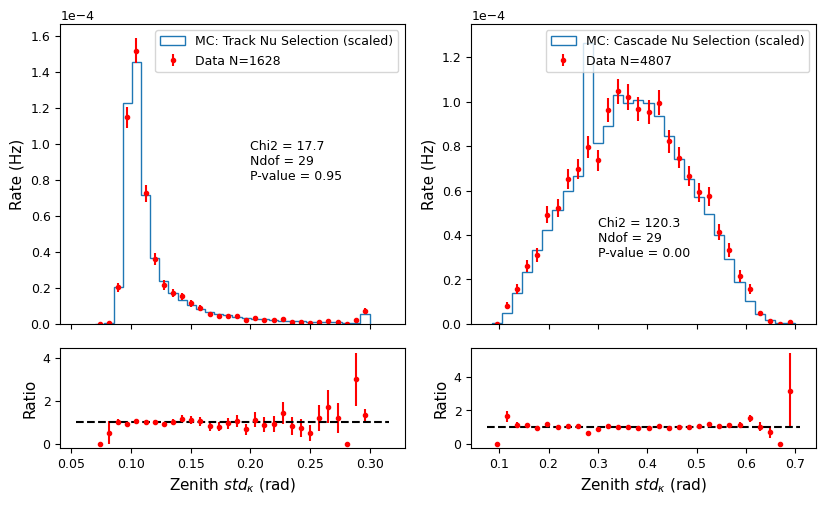

In [64]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.3,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3),density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
#axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.2, 0.8*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.7,31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.7),density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.7),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.7), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=1.35*10**(-4))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(0.3, 0.3*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'zenith_kappa_track_cascade_rate_ratio.png',bbox_inches='tight')

In [65]:
pulses_strings_doms_MC_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Pulses_doms_strings_times_new_muon_db.csv"
pulses_strings_doms_RD_indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/Pulses_doms_strings_times_burnsample.csv"
pulses_strings_doms_MC = pd.read_csv(pulses_strings_doms_MC_indir).sort_values('event_no').reset_index(drop = True)
pulses_strings_doms_RD = pd.read_csv(pulses_strings_doms_RD_indir).sort_values('event_no').reset_index(drop = True)

In [66]:
pulses_strings_doms_MC = pd.merge(pulses_strings_doms_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)

pulses_strings_doms_RD['osc_weight'] = np.ones(len(pulses_strings_doms_RD))*Burnsample_weight 

In [67]:
print(pulses_strings_doms_RD.columns)

Index(['event_no', 'N_pulses', 'N_string', 'N_doms', 'First_dom_time',
       'osc_weight'],
      dtype='object')


In [68]:
print(np.linspace(34.5,254.5,56)[:10])
print(np.linspace(25.5,151.5,64)[:10])

[34.5 38.5 42.5 46.5 50.5 54.5 58.5 62.5 66.5 70.5]
[25.5 27.5 29.5 31.5 33.5 35.5 37.5 39.5 41.5 43.5]


[34.5 38.5 42.5 46.5 50.5 54.5 58.5 62.5 66.5 70.5]
105.91128671631085 54 3.144011179233713e-05
[25.5 27.5 29.5 31.5 33.5 35.5 37.5 39.5 41.5 43.5]
234.1943063550331 62 8.034539193639509e-22


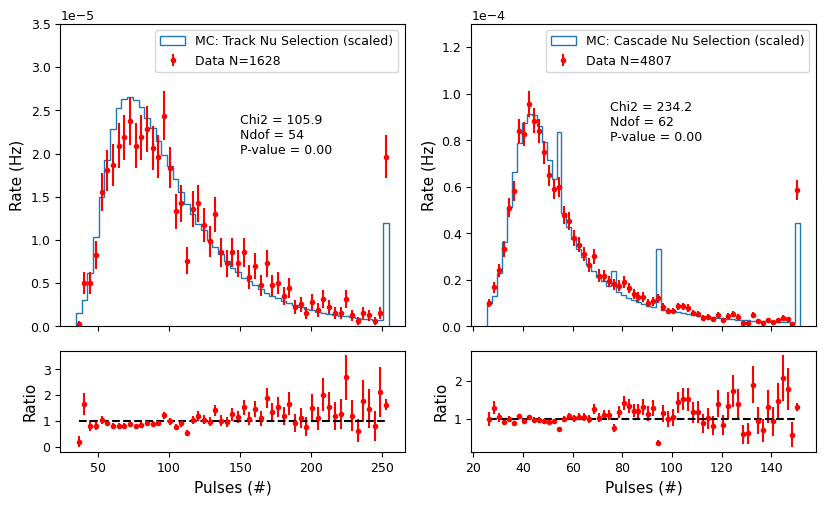

In [69]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_pulses'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(34.5,254.5,56)#np.linspace(34.5,250.5,51)
print(bins[:10])
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),35,254),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),35,254),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip((pulses_strings_doms_MC['N_pulses'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]),35,254), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel('Pulses (#)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=3.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(150, 2*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_pulses'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(25.5,151.5,64)#np.linspace(24.5,150.5,51)
bins_middle = (bins[1:] + bins[:-1])/2
print(bins[:10])
cascade_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),26,151),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_pulses'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),26,151),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip((pulses_strings_doms_MC['N_pulses'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]),26,151), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel('Pulses (#)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=1.3*10**(-4))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(75, 0.8*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'N_pulses_track_cascade_rate_ratio.png',bbox_inches='tight')

[19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 28.5]
32.838683419668115 30 0.3295856051796866
[14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5]
91.10662498146623 30 4.458682085429536e-08


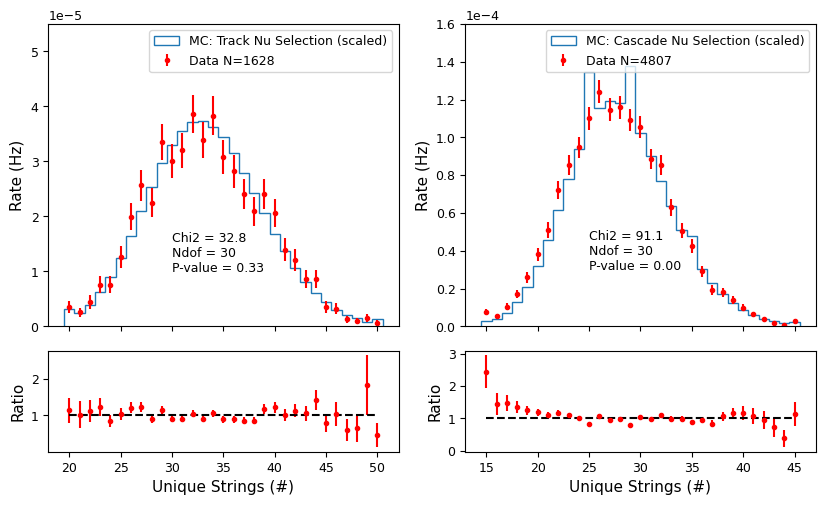

In [70]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_string'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(19.5,50.5,32)
print(bins[:10])
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),20,50),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),20,50),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip((pulses_strings_doms_MC['N_string'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]),20,50), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel('Unique Strings (#)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=5.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(30, 1*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_string'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(14.5,45.5,32)
print(bins[:10])
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),15,45),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_string'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),15,45),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip((pulses_strings_doms_MC['N_string'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]),15,45), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel('Unique Strings (#)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=1.6*10**(-4))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(25, 0.3*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'N_string_track_cascade_rate_ratio.png',bbox_inches='tight')

[29.5 31.5 33.5 35.5 37.5 39.5 41.5 43.5 45.5 47.5]
75.63487515447454 72 0.3619255006238178
[24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5]
511.53242486858136 75 3.3250450940713015e-66


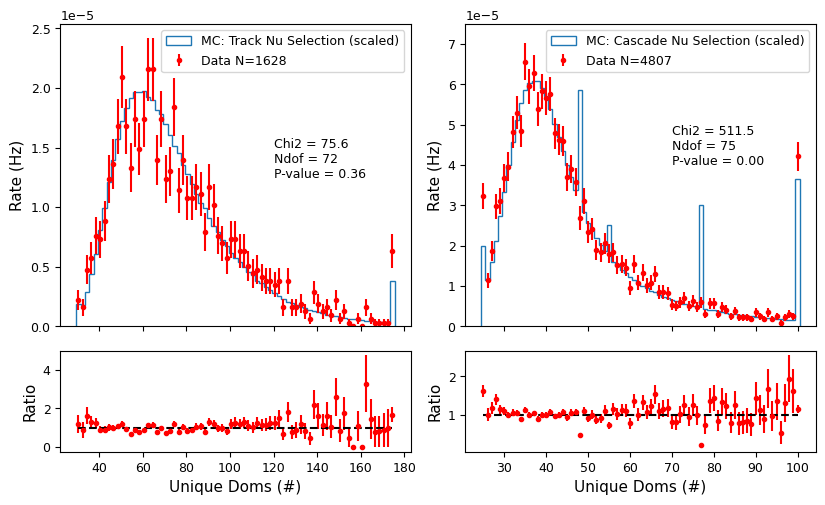

In [71]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_doms'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(29.5,175.5,74)
print(bins[:10])
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),30,175),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_track_selection_RD)]),30,175),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip((pulses_strings_doms_MC['N_doms'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]),30,175), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel('Unique Doms (#)')
axs[0,0].set_ylabel('Rate (Hz)')
#axs[0,0].set_ylim(top=4*9.5**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(120, 1.25*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min((pulses_strings_doms_MC['N_doms'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(24.5,100.5,77)
print(bins[:10])
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),25,100),density=False,bins=bins,weights=pulses_strings_doms_RD['osc_weight'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip((pulses_strings_doms_RD['N_doms'][pulses_strings_doms_RD['event_no'].isin(pure_cascade_selection_RD)]),25,100),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip((pulses_strings_doms_MC['N_doms'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]),25,100), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=pulses_strings_doms_MC['osc_weight'][pulses_strings_doms_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel('Unique Doms (#)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=7.5*10**(-5))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(70, 4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'N_doms_track_cascade_rate_ratio.png',bbox_inches='tight')

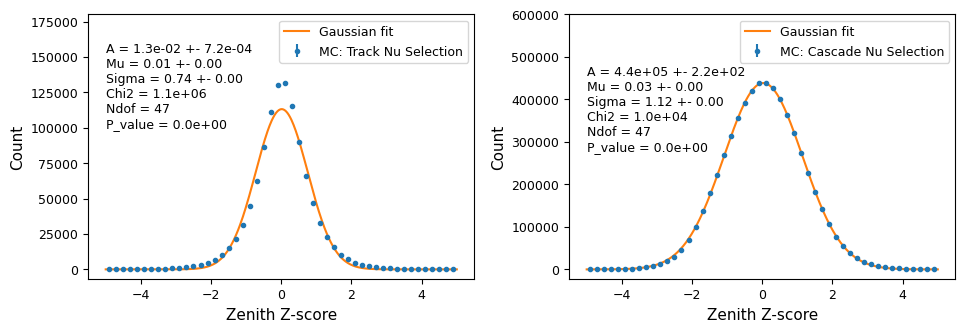

In [72]:
figure_size = set_size('thesis',subplots = (1,2))
figure_size_yfrac = 2
figure_size_xfrac = 1.75
fig, axs = plt.subplots(1,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac))

import scipy.stats as sci
from scipy.optimize import curve_fit

zenith_residuals = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]-zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]
zenith_z_score = zenith_residuals/(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]))

bins_zenith = np.linspace(-5,5,51)
bins_zenith_middle = (bins_zenith[1:] + bins_zenith[:-1])/2

counts_zenith_z_score,_ = np.histogram(np.clip(zenith_z_score,-5,5),bins=bins_zenith)

sigma_zenith_z_score = np.sqrt(counts_zenith_z_score)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**6,0,1]

par, C = curve_fit(gauss, bins_zenith_middle, ydata=counts_zenith_z_score, sigma=sigma_zenith_z_score, p0=guess, absolute_sigma=True) 
C = np.sqrt(np.diag(C))

#fig, axs[1] = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs[1].errorbar(bins_zenith_middle,counts_zenith_z_score,yerr=sigma_zenith_z_score,fmt='.',label='MC: Cascade Nu Selection')

x_plot = np.linspace(-5,5,500)
y_plot = gauss(x_plot,par[0],par[1],par[2])
axs[1].plot(x_plot,y_plot,label='Gaussian fit')

y = gauss(bins_zenith_middle,par[0],par[1],par[2])
chi2_zenith = np.sum((counts_zenith_z_score-y)**2/sigma_zenith_z_score**2)
ndof_zenith = len(counts_zenith_z_score)-len(par)
p_value_zenith = sci.chi2.sf(chi2_zenith,ndof_zenith)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par[0],C[0],par[1],C[1],par[2],C[2],chi2_zenith,ndof_zenith,p_value_zenith)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs[1].text(-5, 2.8*10**5, string,fontsize=9)



axs[1].set_ylabel('Count')
axs[1].set_xlabel('Zenith Z-score')
#axs[1].set_yscale('log')
#axs[1].set_ylim(top=5**8)
axs[1].legend()

zenith_residuals_2 = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)]-zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)]
zenith_z_score_2 = zenith_residuals_2/(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]))

bins_zenith_2 = np.linspace(-5,5,51)
bins_zenith_2_middle = (bins_zenith_2[1:] + bins_zenith_2[:-1])/2

counts_zenith_z_score_2,_ = np.histogram(np.clip(zenith_z_score_2,-5,5),bins=bins_zenith_2)

sigma_zenith_z_score_2 = np.sqrt(counts_zenith_z_score_2)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**5,0,1]

par_2, C_2 = curve_fit(gauss, bins_zenith_2_middle, ydata=counts_zenith_z_score_2, sigma=sigma_zenith_z_score_2, p0=guess, absolute_sigma=True) 
C_2 = np.sqrt(np.diag(C_2))

#fig, axs[0] = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs[0].errorbar(bins_zenith_2_middle,counts_zenith_z_score_2,yerr=sigma_zenith_z_score_2,fmt='.',label='MC: Track Nu Selection')

x_plot_2 = np.linspace(-5,5,500)
y_plot_2 = gauss(x_plot_2,par_2[0],par_2[1],par_2[2])
axs[0].plot(x_plot_2,y_plot_2,label='Gaussian fit')

y = gauss(bins_zenith_2_middle,par_2[1],par_2[1],par_2[2])
chi2_zenith_2 = np.sum((counts_zenith_z_score_2-y)**2/sigma_zenith_z_score_2**2)
ndof_zenith_2 = len(counts_zenith_z_score_2)-len(par_2)
p_value_zenith_2 = sci.chi2.sf(chi2_zenith_2,ndof_zenith_2)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par_2[1],C_2[1],par_2[1],C_2[1],par_2[2],C_2[2],chi2_zenith_2,ndof_zenith_2,p_value_zenith_2)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs[0].text(-5, 1*10**5, string,fontsize=9)



axs[0].set_ylabel('Count')
axs[0].set_xlabel('Zenith Z-score')
#axs[0].set_yscale('log')
axs[0].set_ylim(top=180000)
axs[1].set_ylim(top=600000)
axs[0].legend()




fig.tight_layout()

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'PULL_zenith_track_cascade.png',bbox_inches='tight')
# fig.savefig(outdir+ 'PULL_zenith_C.png', format='png', bbox_inches='tight')

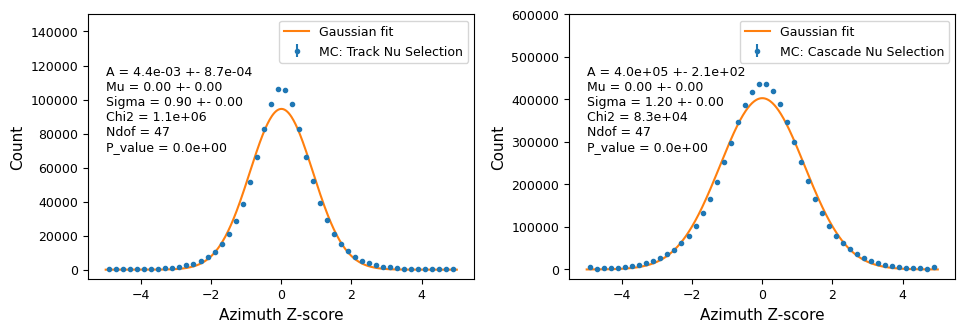

In [73]:
import scipy.stats as sci
from scipy.optimize import curve_fit


figure_size = set_size('thesis',subplots = (1,2))
figure_size_yfrac = 2
figure_size_xfrac = 1.75
fig, axs = plt.subplots(1,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac))

import scipy.stats as sci
from scipy.optimize import curve_fit

azimuth_residuals = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]-azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]
azimuth_residuals[azimuth_residuals<-np.pi] = 2*np.pi + azimuth_residuals[azimuth_residuals<-np.pi]
azimuth_residuals[azimuth_residuals>np.pi] = -2*np.pi + azimuth_residuals[azimuth_residuals>np.pi]

azimuth_z_score = azimuth_residuals/(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]))

bins_azimuth = np.linspace(-5,5,51)
bins_azimuth_middle = (bins_azimuth[1:] + bins_azimuth[:-1])/2

counts_azimuth_z_score,_ = np.histogram(np.clip(azimuth_z_score,-5,5),bins=bins_azimuth)

sigma_azimuth_z_score = np.sqrt(counts_azimuth_z_score)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**6,0,1]

par, C = curve_fit(gauss, bins_azimuth_middle, ydata=counts_azimuth_z_score, sigma=sigma_azimuth_z_score, p0=guess, absolute_sigma=True) 
C = np.sqrt(np.diag(C))

#fig, axs[1] = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs[1].errorbar(bins_azimuth_middle,counts_azimuth_z_score,yerr=sigma_azimuth_z_score,fmt='.',label='MC: Cascade Nu Selection')

x_plot = np.linspace(-5,5,500)
y_plot = gauss(x_plot,par[0],par[1],par[2])
axs[1].plot(x_plot,y_plot,label='Gaussian fit')

y = gauss(bins_azimuth_middle,par[0],par[1],par[2])
chi2_azimuth = np.sum((counts_azimuth_z_score-y)**2/sigma_azimuth_z_score**2)
ndof_azimuth = len(counts_azimuth_z_score)-len(par)
p_value_azimuth = sci.chi2.sf(chi2_azimuth,ndof_azimuth)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par[0],C[0],par[1],C[1],par[2],C[2],chi2_azimuth,ndof_azimuth,p_value_azimuth)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs[1].text(-5, 2.8*10**5, string,fontsize=9)



axs[1].set_ylabel('Count')
axs[1].set_xlabel('Azimuth Z-score')
#axs[1].set_yscale('log')
#axs[1].set_ylim(top=5**8)
axs[1].legend()

azimuth_residuals_2 = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]-azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]
azimuth_residuals_2[azimuth_residuals_2<-np.pi] = 2*np.pi + azimuth_residuals_2[azimuth_residuals_2<-np.pi]
azimuth_residuals_2[azimuth_residuals_2>np.pi] = -2*np.pi + azimuth_residuals_2[azimuth_residuals_2>np.pi]

azimuth_z_score_2 = azimuth_residuals_2/(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]))

bins_azimuth_2 = np.linspace(-5,5,51)
bins_azimuth_2_middle = (bins_azimuth_2[1:] + bins_azimuth_2[:-1])/2

counts_azimuth_z_score_2,_ = np.histogram(np.clip(azimuth_z_score_2,-5,5),bins=bins_azimuth_2)

sigma_azimuth_z_score_2 = np.sqrt(counts_azimuth_z_score_2)


def gauss(x,A,mu,sigma):
    return A*np.exp(-(x - mu)**2/(2*sigma**2)) 

guess = [2.5*10**5,0,1]

par_2, C_2 = curve_fit(gauss, bins_azimuth_2_middle, ydata=counts_azimuth_z_score_2, sigma=sigma_azimuth_z_score_2, p0=guess, absolute_sigma=True) 
C_2 = np.sqrt(np.diag(C_2))

#fig, axs[0] = plt.subplots(1,1,figsize=set_size('thesis'))



hist = axs[0].errorbar(bins_azimuth_2_middle,counts_azimuth_z_score_2,yerr=sigma_azimuth_z_score_2,fmt='.',label='MC: Track Nu Selection')

x_plot_2 = np.linspace(-5,5,500)
y_plot_2 = gauss(x_plot_2,par_2[0],par_2[1],par_2[2])
axs[0].plot(x_plot_2,y_plot_2,label='Gaussian fit')

y = gauss(bins_azimuth_2_middle,par_2[1],par_2[1],par_2[2])
chi2_azimuth_2 = np.sum((counts_azimuth_z_score_2-y)**2/sigma_azimuth_z_score_2**2)
ndof_azimuth_2 = len(counts_azimuth_z_score_2)-len(par_2)
p_value_azimuth_2 = sci.chi2.sf(chi2_azimuth_2,ndof_azimuth_2)

string = "A = {:.1e} +- {:.1e}\nMu = {:.2f} +- {:.2f}\nSigma = {:.2f} +- {:.2f}\nChi2 = {:.1e}\nNdof = {:.0f}\nP_value = {:.1e}".format(par_2[1],C_2[1],par_2[1],C_2[1],par_2[2],C_2[2],chi2_azimuth_2,ndof_azimuth_2,p_value_azimuth_2)
# string = "Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}".format()
axs[0].text(-5, 0.7*10**5, string,fontsize=9)



axs[0].set_ylabel('Count')
axs[0].set_xlabel('Azimuth Z-score')
#axs[0].set_yscale('log')
axs[1].set_ylim(top=600000)
axs[0].set_ylim(top=150000)
axs[0].legend()




fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'PULL_azimuth_track_cascade.png',bbox_inches='tight')

In [85]:
bins_azimuth = np.linspace(0,2*np.pi,51)
track_energy_per_azimuth_MC = []
track_number_per_azimuth_MC = []
cascade_energy_per_azimuth_MC = []
cascade_number_per_azimuth_MC = []
track_energy_per_azimuth_RD = []
track_number_per_azimuth_RD = []
cascade_energy_per_azimuth_RD = []
cascade_number_per_azimuth_RD = []
for i in range(len(bins_azimuth)-1):
    azi_min, azi_max = bins_azimuth[i],bins_azimuth[i+1]
    track_events_nos_for_energy_MC = azimuth_MC['event_no'][(azimuth_MC['azimuth_pred'] > azi_min) & (azimuth_MC['azimuth_pred'] < azi_max) & (azimuth_MC['event_no'].isin(pure_track_selection_MC))]
    cascade_events_nos_for_energy_MC = azimuth_MC['event_no'][(azimuth_MC['azimuth_pred'] > azi_min) & (azimuth_MC['azimuth_pred'] < azi_max) & (azimuth_MC['event_no'].isin(pure_cascade_selection_MC))]
    track_number_per_azimuth_MC.append(len(track_events_nos_for_energy_MC))
    cascade_number_per_azimuth_MC.append(len(cascade_events_nos_for_energy_MC))
    track_energy_per_azimuth_MC.append(np.average(energy_MC['energy_pred'][energy_MC['event_no'].isin(track_events_nos_for_energy_MC.to_list())],weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(track_events_nos_for_energy_MC.to_list())]))
    cascade_energy_per_azimuth_MC.append(np.average(energy_MC['energy_pred'][energy_MC['event_no'].isin(cascade_events_nos_for_energy_MC.to_list())],weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(cascade_events_nos_for_energy_MC.to_list())]))
    track_events_nos_for_energy_RD = azimuth_RD['event_no'][(azimuth_RD['azimuth_pred'] > azi_min) & (azimuth_RD['azimuth_pred'] < azi_max) & (azimuth_RD['event_no'].isin(pure_track_selection_RD))]
    cascade_events_nos_for_energy_RD = azimuth_RD['event_no'][(azimuth_RD['azimuth_pred'] > azi_min) & (azimuth_RD['azimuth_pred'] < azi_max) & (azimuth_RD['event_no'].isin(pure_cascade_selection_RD))]
    track_number_per_azimuth_RD.append(len(track_events_nos_for_energy_RD))
    cascade_number_per_azimuth_RD.append(len(cascade_events_nos_for_energy_RD))
    track_energy_per_azimuth_RD.append(np.average(energy_RD['energy_pred'][energy_RD['event_no'].isin(track_events_nos_for_energy_RD.to_list())],weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(track_events_nos_for_energy_RD.to_list())]))
    cascade_energy_per_azimuth_RD.append(np.average(energy_RD['energy_pred'][energy_RD['event_no'].isin(cascade_events_nos_for_energy_RD.to_list())],weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(cascade_events_nos_for_energy_RD.to_list())]))

In [91]:
bins_zenith = np.linspace(0,np.pi,51)
track_energy_per_zenith_MC = []
track_number_per_zenith_MC = []
cascade_energy_per_zenith_MC = []
cascade_number_per_zenith_MC = []
track_energy_per_zenith_RD = []
track_number_per_zenith_RD = []
cascade_energy_per_zenith_RD = []
cascade_number_per_zenith_RD = []
for i in range(len(bins_zenith)-1):
    azi_min, azi_max = bins_zenith[i],bins_zenith[i+1]
    
    track_events_nos_for_energy_MC = zenith_MC['event_no'][(zenith_MC['zenith_pred'] > azi_min) & (zenith_MC['zenith_pred'] < azi_max) & (zenith_MC['event_no'].isin(pure_track_selection_MC))]
    cascade_events_nos_for_energy_MC = zenith_MC['event_no'][(zenith_MC['zenith_pred'] > azi_min) & (zenith_MC['zenith_pred'] < azi_max) & (zenith_MC['event_no'].isin(pure_cascade_selection_MC))]
    track_events_nos_for_energy_RD = zenith_RD['event_no'][(zenith_RD['zenith_pred'] > azi_min) & (zenith_RD['zenith_pred'] < azi_max) & (zenith_RD['event_no'].isin(pure_track_selection_RD))]
    cascade_events_nos_for_energy_RD = zenith_RD['event_no'][(zenith_RD['zenith_pred'] > azi_min) & (zenith_RD['zenith_pred'] < azi_max) & (zenith_RD['event_no'].isin(pure_cascade_selection_RD))]
    
    if len(track_events_nos_for_energy_MC)!=0 and len(track_events_nos_for_energy_RD)!=0: 
        track_number_per_zenith_MC.append(len(track_events_nos_for_energy_MC))
        track_energy_per_zenith_MC.append(np.average(energy_MC['energy_pred'][energy_MC['event_no'].isin(track_events_nos_for_energy_MC.to_list())],weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(track_events_nos_for_energy_MC.to_list())]))
        track_number_per_zenith_RD.append(len(track_events_nos_for_energy_RD))
        track_energy_per_zenith_RD.append(np.average(energy_RD['energy_pred'][energy_RD['event_no'].isin(track_events_nos_for_energy_RD.to_list())],weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(track_events_nos_for_energy_RD.to_list())]))
    else:
        track_number_per_zenith_MC.append(0)
        track_energy_per_zenith_MC.append(0)
        track_number_per_zenith_RD.append(0)
        track_energy_per_zenith_RD.append(0)

    if len(cascade_events_nos_for_energy_MC)!=0 and len(cascade_events_nos_for_energy_RD)!=0: 
        cascade_number_per_zenith_MC.append(len(cascade_events_nos_for_energy_MC))
        cascade_energy_per_zenith_MC.append(np.average(energy_MC['energy_pred'][energy_MC['event_no'].isin(cascade_events_nos_for_energy_MC.to_list())],weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(cascade_events_nos_for_energy_MC.to_list())]))
        cascade_number_per_zenith_RD.append(len(cascade_events_nos_for_energy_RD))
        cascade_energy_per_zenith_RD.append(np.average(energy_RD['energy_pred'][energy_RD['event_no'].isin(cascade_events_nos_for_energy_RD.to_list())],weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(cascade_events_nos_for_energy_RD.to_list())]))
    else:
        cascade_number_per_zenith_MC.append(0)
        cascade_energy_per_zenith_MC.append(0)
        cascade_number_per_zenith_RD.append(0)
        cascade_energy_per_zenith_RD.append(0)

In [98]:
print([True if track_energy_per_zenith_RD[i] !=0 else False for i in range(len(track_energy_per_zenith_RD))])

[False, False, False, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False]


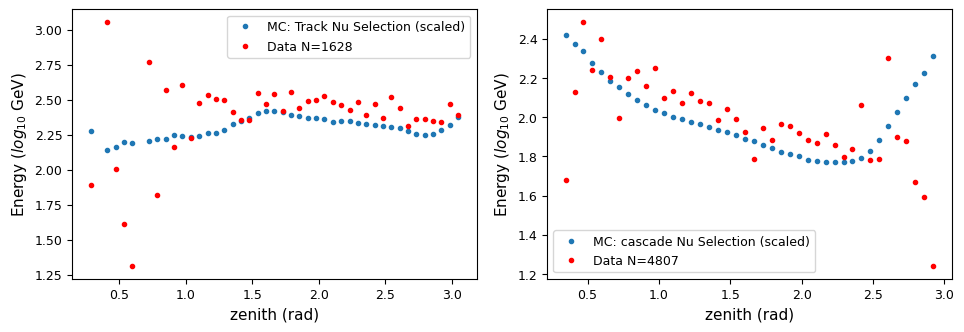

In [102]:
track_mask = [True if track_energy_per_zenith_RD[i] !=0 else False for i in range(len(track_energy_per_zenith_RD))]
cascade_mask = [True if cascade_energy_per_zenith_RD[i] !=0 else False for i in range(len(cascade_energy_per_zenith_RD))]
track_energy_per_zenith_MC = np.array(track_energy_per_zenith_MC)
cascade_energy_per_zenith_MC = np.array(cascade_energy_per_zenith_MC)
cascade_energy_per_zenith_RD = np.array(cascade_energy_per_zenith_RD)
track_energy_per_zenith_RD = np.array(track_energy_per_zenith_RD)
bins_zenith_middle = (bins_zenith[1:]+bins_zenith[:-1])/2

figure_size = set_size('thesis',subplots = (1,2))
figure_size_yfrac = 2
figure_size_xfrac = 1.75
fig, axs = plt.subplots(1,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac))


axs[0].errorbar(bins_zenith_middle[track_mask],np.log10(track_energy_per_zenith_MC[track_mask]),fmt='.',label='MC: Track Nu Selection (scaled)')
axs[0].errorbar(bins_zenith_middle[track_mask],np.log10(track_energy_per_zenith_RD[track_mask]),fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')

axs[0].set_ylabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_xlabel('zenith (rad)')

axs[0].legend()

axs[1].errorbar(bins_zenith_middle[cascade_mask],np.log10(cascade_energy_per_zenith_MC[cascade_mask]),fmt='.',label='MC: cascade Nu Selection (scaled)')
axs[1].errorbar(bins_zenith_middle[cascade_mask],np.log10(cascade_energy_per_zenith_RD[cascade_mask]),fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')

axs[1].set_ylabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_xlabel('zenith (rad)')
axs[1].legend()


fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'Energy_as_func_of_zenith_track_cascade.png',bbox_inches='tight')

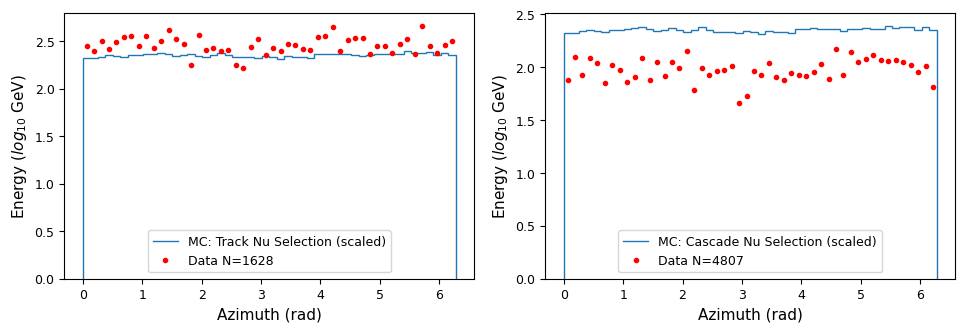

In [103]:
bins_azimuth_middle = (bins_azimuth[1:]+bins_azimuth[:-1])/2

figure_size = set_size('thesis',subplots = (1,2))
figure_size_yfrac = 2
figure_size_xfrac = 1.75
fig, axs = plt.subplots(1,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac))


axs[0].stairs(np.log10(track_energy_per_azimuth_MC),bins_azimuth,label='MC: Track Nu Selection (scaled)')
axs[0].errorbar(bins_azimuth_middle,np.log10(track_energy_per_azimuth_RD),fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')

axs[0].set_ylabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_xlabel('Azimuth (rad)')

axs[0].legend()

axs[1].stairs(np.log10(track_energy_per_azimuth_MC),bins_azimuth,label='MC: Cascade Nu Selection (scaled)')
axs[1].errorbar(bins_azimuth_middle,np.log10(cascade_energy_per_azimuth_RD),fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')

axs[1].set_ylabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_xlabel('Azimuth (rad)')
axs[1].legend()


fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
fig.savefig(outdir + 'Energy_as_func_of_azimuth_track_cascade.png',bbox_inches='tight')

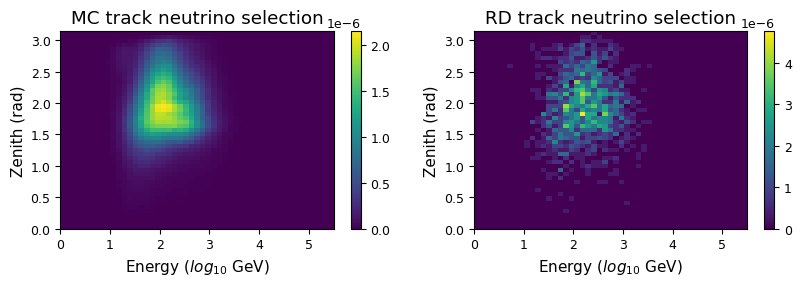

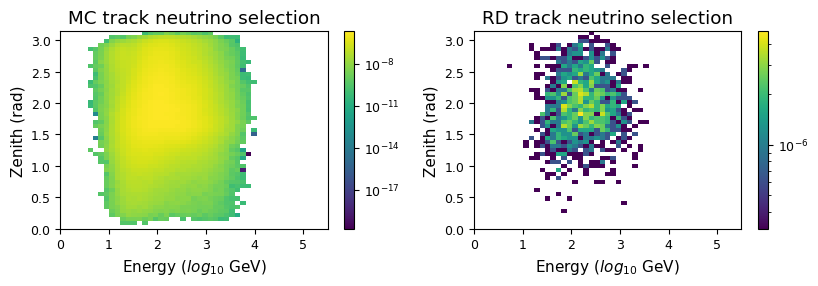

In [72]:

fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))


bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC track neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD track neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_tracks.png',bbox_inches='tight')


fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)],density=False,label='MC track neutrino selection',norm='log')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC track neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,label='RD track neutrino selection',norm='log')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD track neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_tracks_log.png',bbox_inches='tight')

In [73]:
# run_before = False
# if not run_before:
#     energy_and_zenith_RD = pd.merge(energy_RD.reset_index(drop=True),zenith_RD.reset_index(drop=True),on='event_no',how='inner')
# pure_track_selection_RD_vers2 = energy_and_zenith_RD['event_no'][(energy_and_zenith_RD['energy_pred']<10**3)&(energy_and_zenith_RD['zenith_pred']>1.5)&energy_and_zenith_RD['event_no'].isin(pure_track_selection_RD)]

# print(len(pure_track_selection_RD_vers2.reset_index(drop=True)))
# print('out of')
# print(len(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
# print(pure_track_selection_RD_vers2.reset_index(drop=True))

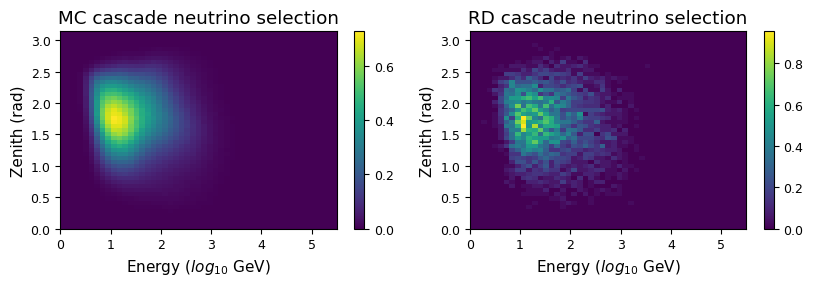

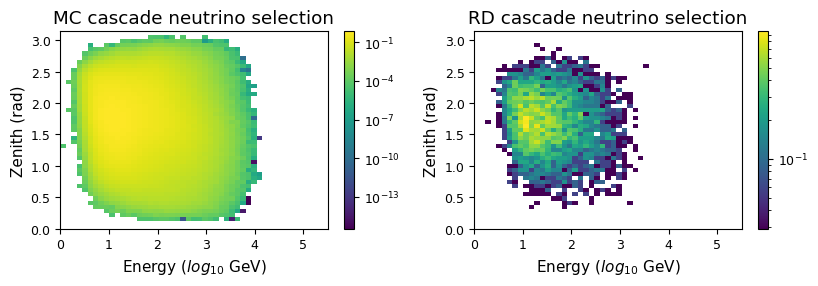

In [74]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC cascade neutrino selection')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC cascade neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD cascade neutrino selection')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD cascade neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_cascades.png',bbox_inches='tight')

fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins = [np.linspace(0,5.5,50),np.linspace(0,np.pi,50)]
hist = axs[0].hist2d(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],bins=bins,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)],density=True,label='MC cascade neutrino selection',norm='log')
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Zenith (rad)')
axs[0].set_title('MC cascade neutrino selection')
axs[0].set_xlim(0,5.5)
axs[0].set_ylim(0,np.pi)
fig.colorbar(hist[3],ax=axs[0])

hist2 = axs[1].hist2d(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=True,label='RD cascade neutrino selection',norm='log')
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[1].set_ylabel('Zenith (rad)')
axs[1].set_title('RD cascade neutrino selection')
axs[1].set_xlim(0,5.5)
axs[1].set_ylim(0,np.pi)
fig.colorbar(hist2[3],ax=axs[1])

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
fig.savefig(outdir + 'zenith_energy_2d_hist_cascades_log.png',bbox_inches='tight')

In [75]:

# pure_cascade_selection_RD_vers2 = energy_and_zenith_RD['event_no'][(energy_and_zenith_RD['energy_pred']<10**3)&energy_and_zenith_RD['event_no'].isin(pure_cascade_selection_RD)]

# print(len(pure_cascade_selection_RD_vers2.reset_index(drop=True)))
# print('out of')
# print(len(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
# print(pure_cascade_selection_RD_vers2.reset_index(drop=True))

In [76]:
#len(muon_event_nos)
#len(noise_event_nos)
muon_noise_cut = 0.9
neutrino_logit_cut = 12
muon_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_muon_pred'] > muon_noise_cut]
muon_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_muon_pred'] > muon_noise_cut]
noise_selection_MC = multiclass_MC['event_no'][multiclass_MC['pid_noise_pred'] > muon_noise_cut]
noise_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_noise_pred'] > muon_noise_cut]
neutrino_selection_MC_0_5 = multiclass_MC['event_no'][multiclass_MC['pid_neutrino_pred_logit'] > neutrino_logit_cut]
neutrino_selection_RD_0_5 = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > neutrino_logit_cut]


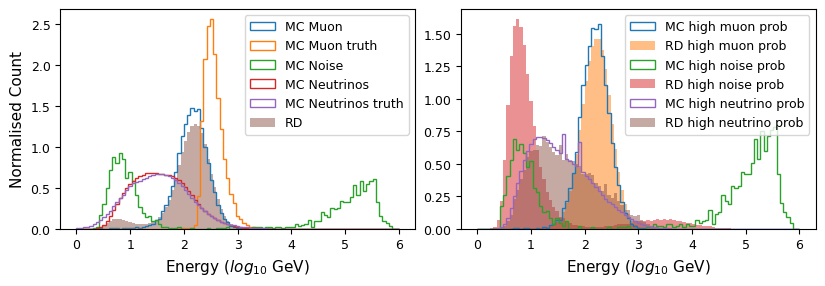

In [77]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_selection_MC_0_5)]), histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy.png',bbox_inches='tight')

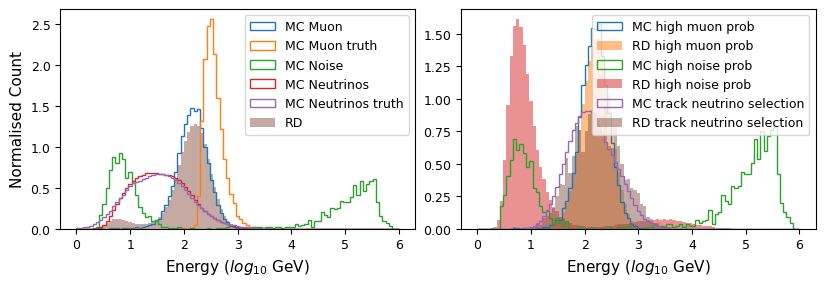

In [78]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]), histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track neutrino selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD cascade selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy_track.png',bbox_inches='tight')

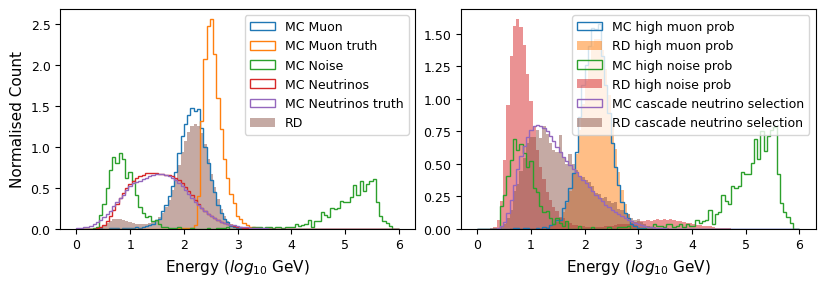

In [79]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,6,100)
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(muon_event_nos)]), histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_event_nos)]), histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(neutrino_event_nos)]), histtype='step',density=True,label='MC Neutrinos truth',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(np.log10(energy_RD['energy_pred']), histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'])
axs[0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0].set_ylabel('Normalised Count')
axs[0].legend(loc='upper right')

bins=np.linspace(0,6,100)
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(muon_selection_MC)]), histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(muon_selection_RD)]), histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(noise_selection_MC)]), histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(noise_selection_RD)]), histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]), histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)]), histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(neutrino_selection_RD_0_5)])
#axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]), histtype='stepfilled',density=True,label='RD track selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
axs[1].hist(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]), histtype='stepfilled',density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel(r'Energy ($log_{10}$ GeV)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_energy_cascade.png',bbox_inches='tight')

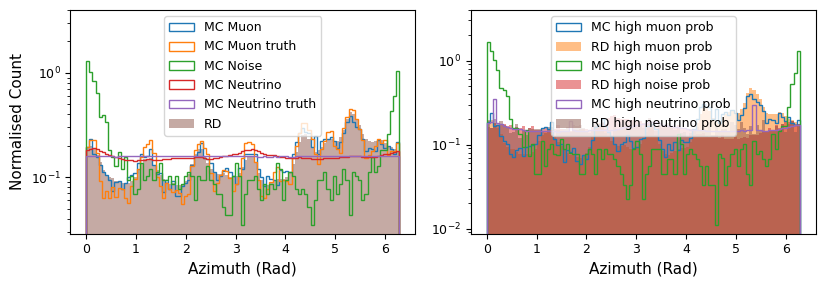

In [80]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,2*np.pi,100)
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(azimuth_RD['azimuth_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'])
axs[0].set_xlabel('Azimuth (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_yscale('log')
axs[0].set_ylim(top=4)
axs[0].legend(loc='upper center')

bins=np.linspace(0,2*np.pi,100)
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(neutrino_selection_MC_0_5)], histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].set_xlabel('Azimuth (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].set_yscale('log')
axs[1].set_ylim(top=4)
axs[1].legend(loc='upper center')
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_azimuth.png',bbox_inches='tight')

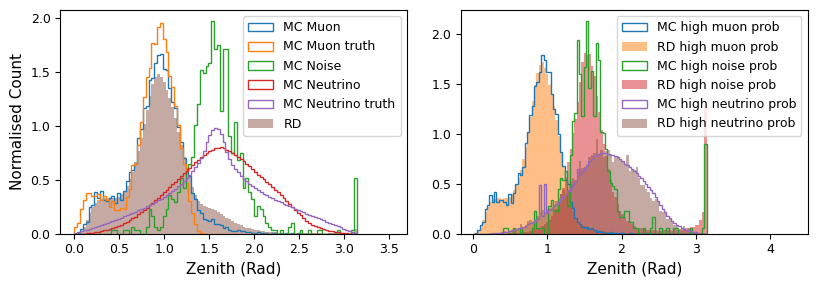

In [81]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)], histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith.png',bbox_inches='tight')

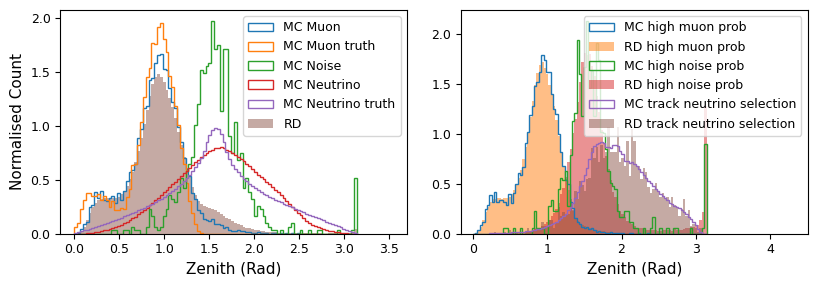

In [82]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=True,label='MC track neutrino selection',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
#axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)], histtype='stepfilled',density=True,label='RD high neutrino prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(neutrino_selection_RD_0_5)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)], histtype='stepfilled',density=True,label='RD track neutrino selection',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])

axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith_track.png',bbox_inches='tight')

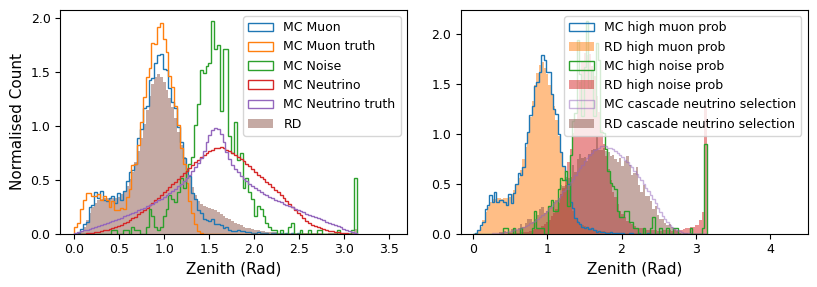

In [83]:
fig, axs = plt.subplots(1,2,figsize=set_size('thesis',fraction=1.5,subplots=(1,2),y_size=3))

bins=np.linspace(0,np.pi,100)
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(muon_event_nos)], histtype='step',density=True,label='MC Muon truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_event_nos)], histtype='step',density=True,label='MC Noise',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_event_nos)])
axs[0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(neutrino_event_nos)], histtype='step',density=True,label='MC Neutrino truth',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_event_nos)])
axs[0].hist(zenith_RD['zenith_pred'], histtype='stepfilled',density=True,label='RD',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'])
axs[0].set_xlabel('Zenith (Rad)')
axs[0].set_ylabel('Normalised Count')
axs[0].set_xlim(right=3.7)
axs[0].legend(loc='upper right')

bins=np.linspace(0,np.pi,100)
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(muon_selection_MC)], histtype='step',density=True,label='MC high muon prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(muon_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(muon_selection_RD)], histtype='stepfilled',density=True,label='RD high muon prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(muon_selection_RD)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(noise_selection_MC)], histtype='step',density=True,label='MC high noise prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(noise_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(noise_selection_RD)], histtype='stepfilled',density=True,label='RD high noise prob',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(noise_selection_RD)])
#axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)], histtype='step',density=True,label='MC high neutrino prob',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(neutrino_selection_MC_0_5)])
axs[1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
axs[1].hist(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)], histtype='stepfilled',density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
axs[1].set_xlabel('Zenith (Rad)')
#axs[1].set_ylabel('Normalised Count')
axs[1].legend(loc='upper right')
axs[1].set_xlim(right=4.5)
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/muon_noise_(neutrinos)/"
fig.savefig(outdir + 'muon_noise_neutrinos_zenith_cascade.png',bbox_inches='tight')

In [84]:
track_cascade_csvs_created = True

In [85]:
if not track_cascade_csvs_created :
    additional_info_MC_path = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/Pulses_doms_strings_times_new_muon_db.csv"
    additional_info_RD_path = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/Pulses_doms_strings_times_burnsample.csv"

    additional_info_MC = pd.read_csv(additional_info_MC_path)
    additional_info_RD = pd.read_csv(additional_info_RD_path)
    outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
    MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [86]:
if not track_cascade_csvs_created:
    All_info_MC_cascades = pd.DataFrame()
    All_info_MC_cascades['event_no'] = additional_info_MC['event_no'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['N_pulses'] = additional_info_MC['N_pulses'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['N_string'] = additional_info_MC['N_string'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['N_doms'] = additional_info_MC['N_doms'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['First_dom_time'] = additional_info_MC['First_dom_time'][additional_info_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['osc_weight'] = energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['zenith_kappa'] = zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['azimuth_kappa'] = azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['track_mu'] = track_cascade_MC['track_mu'][track_cascade_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['pid'] = multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['pid_neutrino_pred'] = multiclass_MC['pid_neutrino_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['pid_muon_pred'] = multiclass_MC['pid_muon_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['pid_noise_pred'] = multiclass_MC['pid_noise_pred'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)
    All_info_MC_cascades['pid_neutrino_pred_logit'] = multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)

    All_info_MC_cascades['interaction_type'] = MC_interaction_type['interaction_type'][MC_interaction_type['event_no'].isin(pure_cascade_selection_MC)].reset_index(drop=True)


In [87]:
if not track_cascade_csvs_created:
    All_info_MC_tracks = pd.DataFrame()
    All_info_MC_tracks['event_no'] = additional_info_MC['event_no'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['N_pulses'] = additional_info_MC['N_pulses'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['N_string'] = additional_info_MC['N_string'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['N_doms'] = additional_info_MC['N_doms'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['First_dom_time'] = additional_info_MC['First_dom_time'][additional_info_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['osc_weight'] = energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['zenith_kappa'] = zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['azimuth_kappa'] = azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['track_mu'] = track_cascade_MC['track_mu'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['pid'] = multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['pid_neutrino_pred'] = multiclass_MC['pid_neutrino_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['pid_muon_pred'] = multiclass_MC['pid_muon_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['pid_noise_pred'] = multiclass_MC['pid_noise_pred'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)
    All_info_MC_tracks['pid_neutrino_pred_logit'] = multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)

    All_info_MC_tracks['interaction_type'] = MC_interaction_type['interaction_type'][MC_interaction_type['event_no'].isin(pure_track_selection_MC)].reset_index(drop=True)


In [88]:
if not track_cascade_csvs_created:
    All_info_outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
    All_info_MC_cascades.to_csv(All_info_outdir + 'MC_cascades.csv',index=False)
    All_info_MC_tracks.to_csv(All_info_outdir + 'MC_tracks.csv',index=False)
else:
    All_info_outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
    All_info_MC_cascades = pd.read_csv(All_info_outdir + 'MC_cascades.csv')
    All_info_MC_tracks = pd.read_csv(All_info_outdir + 'MC_tracks.csv')

In [89]:
# additional_info_RD.head(1)

In [90]:
if not track_cascade_csvs_created:
    All_info_RD_cascades = pd.DataFrame()
    All_info_RD_cascades['event_no'] = additional_info_RD['event_no'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['N_pulses'] = additional_info_RD['N_pulses'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['N_string'] = additional_info_RD['N_string'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['N_doms'] = additional_info_RD['N_doms'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['First_dom_time'] = additional_info_RD['First_dom_time'][additional_info_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

    All_info_RD_cascades['energy_pred'] = energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['osc_weight'] = energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

    All_info_RD_cascades['zenith_pred'] = zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['zenith_kappa'] = zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

    All_info_RD_cascades['azimuth_pred'] = azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['azimuth_kappa'] = azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

    All_info_RD_cascades['track_mu_pred'] = track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)

    All_info_RD_cascades['pid_neutrino_pred'] = multiclass_RD['pid_neutrino_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['pid_muon_pred'] = multiclass_RD['pid_muon_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['pid_noise_pred'] = multiclass_RD['pid_noise_pred'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)
    All_info_RD_cascades['pid_neutrino_pred_logit'] = multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD)].reset_index(drop=True)



In [91]:
if not track_cascade_csvs_created:
    All_info_RD_tracks = pd.DataFrame()
    All_info_RD_tracks['event_no'] = additional_info_RD['event_no'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['N_pulses'] = additional_info_RD['N_pulses'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['N_string'] = additional_info_RD['N_string'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['N_doms'] = additional_info_RD['N_doms'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['First_dom_time'] = additional_info_RD['First_dom_time'][additional_info_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

    All_info_RD_tracks['energy_pred'] = energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['osc_weight'] = energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

    All_info_RD_tracks['zenith_pred'] = zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['zenith_kappa'] = zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

    All_info_RD_tracks['azimuth_pred'] = azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['azimuth_kappa'] = azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

    All_info_RD_tracks['track_mu_pred'] = track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)

    All_info_RD_tracks['pid_neutrino_pred'] = multiclass_RD['pid_neutrino_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['pid_muon_pred'] = multiclass_RD['pid_muon_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['pid_noise_pred'] = multiclass_RD['pid_noise_pred'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)
    All_info_RD_tracks['pid_neutrino_pred_logit'] = multiclass_RD['pid_neutrino_pred_logit'][multiclass_RD['event_no'].isin(pure_track_selection_RD)].reset_index(drop=True)



In [92]:
# if not track_cascade_csvs_created:
#     All_info_RD_cascades.to_csv(All_info_outdir + 'RD_cascades.csv',index=False)
#     All_info_RD_tracks.to_csv(All_info_outdir + 'RD_tracks.csv',index=False)
# else:
#     All_info_RD_cascades = pd.read_csv(All_info_outdir + 'RD_cascades.csv')
#     All_info_RD_tracks = pd.read_csv(All_info_outdir + 'RD_tracks.csv')

In [93]:
# print(len(pure_cascade_selection_MC))
# print(len(All_info_MC_cascades))
# print(len(pure_track_selection_MC))
# print(len(All_info_MC_tracks))
# print(len(pure_cascade_selection_RD))
# print(len(All_info_RD_cascades))
# print(len(pure_track_selection_RD))
# print(len(All_info_RD_tracks))

In [94]:

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(0,8000,1000)+0.5
# axs[0].hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[0].hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# axs[0].set_yscale('log')
# axs[0].legend(loc='lower right')

# bins=np.linspace(0,8000,8001)+0.5#np.linspace(25,75,51)+0.5
# #axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
# axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
# axins.hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axins.hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
# axins.set_xlim(25,75)
# axins.set_ylim(0.009,0.03)
# #axins.set_yscale('log')
# # plt.xticks(visible=False)
# # plt.yticks(visible=False)
# mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

# bins=np.linspace(-1,650,652)+0.5
# axs[1].hist(All_info_MC_cascades['N_doms'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[1].hist(All_info_RD_cascades['N_doms'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_cascades['N_string'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[2].hist(All_info_RD_cascades['N_string'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# axs[2].set_yscale('log')
# axs[2].legend(loc='lower right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
# fig.savefig(outdir + 'cascade_pulses_strings_doms_log.png',bbox_inches='tight')

In [95]:
# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(-1,250,252)+0.5
# axs[0].hist(All_info_MC_cascades['N_pulses'],density=True,label='MC cascade neutrino selection. Cut at 250',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[0].hist(All_info_RD_cascades['N_pulses'],density=True,label='RD cascade neutrino selection. Cut at 250',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# #axs[0].set_yscale('log')
# axs[0].legend(loc='upper right')


# bins=np.linspace(-1,150,152)+0.5
# axs[1].hist(All_info_MC_cascades['N_doms'],density=True,label='MC cascade neutrino selection. Cut at 150',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[1].hist(All_info_RD_cascades['N_doms'],density=True,label='RD cascade neutrino selection. Cut at 150',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# #axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_cascades['N_string'],density=True,label='MC cascade neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_cascades['osc_weight'])
# axs[2].hist(All_info_RD_cascades['N_string'],density=True,label='RD cascade neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# #axs[2].set_yscale('log')
# axs[2].legend(loc='upper right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
# fig.savefig(outdir + 'cascade_pulses_strings_doms.png',bbox_inches='tight')

In [96]:

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(0,8000,1000)+0.5
# axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[0].hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# axs[0].set_yscale('log')
# axs[0].legend(loc='lower right')

# bins=np.linspace(0,8000,8000)+0.5#np.linspace(40,120,81)+0.5
# #axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
# axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
# axins.hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axins.hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axins.set_xlim(40,120)
# axins.set_ylim(0.00001,0.015)
# axins.set_yscale('log')
# # plt.xticks(visible=False)
# # plt.yticks(visible=False)
# mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

# bins=np.linspace(-1,650,652)+0.5
# axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[1].hist(All_info_RD_tracks['N_doms'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[2].hist(All_info_RD_tracks['N_string'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# axs[2].set_yscale('log')
# axs[2].legend(loc='lower right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
# fig.savefig(outdir + 'track_pulses_strings_doms_log.png',bbox_inches='tight')

In [97]:
# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(-1,650,652)+0.5
# axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection. Cut at 650',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[0].hist(All_info_RD_tracks['N_pulses'],density=True,label='RD track neutrino selection. Cut at 650',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# #axs[0].set_yscale('log')
# axs[0].legend(loc='upper right')


# bins=np.linspace(-1,450,452)+0.5
# axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection. Cut at 450',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[1].hist(All_info_RD_tracks['N_doms'],density=True,label='RD track neutrino selection. Cut at 450',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# #axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[2].hist(All_info_RD_tracks['N_string'],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# #axs[2].set_yscale('log')
# axs[2].legend(loc='upper right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/"
# fig.savefig(outdir + 'track_pulses_strings_doms.png',bbox_inches='tight')

In [98]:

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(0,8000,1000)+0.5
# axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[0].hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# axs[0].set_yscale('log')
# axs[0].legend(loc='lower right')

# bins=np.linspace(0,8000,8001)+0.5#np.linspace(40,120,81)+0.5
# #axins = zoomed_inset_axes(axs[0], zoom=4, loc='lower right',bbox_to_anchor=(500,850)) # zoom = 6
# axins = axs[0].inset_axes([0.55, 0.55, 0.4, 0.4]) 
# axins.hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axins.hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axins.set_xlim(40,120)
# axins.set_ylim(0.0001,0.02)
# axins.set_yscale('log')
# # plt.xticks(visible=False)
# # plt.yticks(visible=False)
# mark_inset(axs[0], axins, loc1=1, loc2=3, fc="none", ec="0.5")

# bins=np.linspace(-1,650,652)+0.5
# axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[1].hist(All_info_RD_tracks['N_doms'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[2].hist(All_info_RD_tracks['N_string'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# axs[2].set_yscale('log')
# axs[2].legend(loc='lower right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
# fig.savefig(outdir + 'track_pulses_strings_doms_log_vers2.png',bbox_inches='tight')

In [99]:
# fig, axs = plt.subplots(3,1,figsize=set_size('thesis',subplots=(3,1)))
# bins=np.linspace(-1,400,402)+0.5
# axs[0].hist(All_info_MC_tracks['N_pulses'],density=True,label='MC track neutrino selection. Cut at 400',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[0].hist(All_info_RD_tracks['N_pulses'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection. Cut at 400',bins=bins,alpha=0.5)
# axs[0].set_xlabel('Number of pulses in event')
# axs[0].set_ylabel('Normalised Count')
# #axs[0].set_yscale('log')
# axs[0].legend(loc='upper right')


# bins=np.linspace(-1,250,252)+0.5
# axs[1].hist(All_info_MC_tracks['N_doms'],density=True,label='MC track neutrino selection. Cut at 250',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[1].hist(All_info_RD_tracks['N_doms'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection. Cut at 250',bins=bins,alpha=0.5)
# axs[1].set_xlabel('Number of activated doms in event')
# axs[1].set_ylabel('Normalised Count')
# #axs[1].set_yscale('log')
# axs[1].legend(loc='upper right')

# bins=np.linspace(-1,100,102)+0.5
# axs[2].hist(All_info_MC_tracks['N_string'],density=True,label='MC track neutrino selection',bins=bins,alpha=0.5,weights=All_info_MC_tracks['osc_weight'])
# axs[2].hist(All_info_RD_tracks['N_string'][All_info_RD_tracks['event_no'].isin(pure_track_selection_RD_vers2.to_list())],density=True,label='RD track neutrino selection',bins=bins,alpha=0.5)
# axs[2].set_xlabel('Number of activated strings in event')
# axs[2].set_ylabel('Normalised Count')
# #axs[2].set_yscale('log')
# axs[2].legend(loc='upper right')

# fig.tight_layout()
# outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/Comparison_with_3_muons_in/Further_cleaned/"
# fig.savefig(outdir + 'track_pulses_strings_doms_vers2.png',bbox_inches='tight')

In [100]:
# energy_pure_track_selection_RD_vers2 =energy_RD[energy_RD['event_no'].isin(pure_track_selection_RD_vers2.to_list())]
# energy_pure_track_selection_RD_vers2.sort_values(by='energy_pred',inplace=True)
# print('track RD low energy',energy_pure_track_selection_RD_vers2['event_no'].to_list()[:25])
# print('track RD high energy',energy_pure_track_selection_RD_vers2['event_no'].to_list()[-25:])

# energy_pure_track_selection_MC =energy_MC[energy_MC['event_no'].isin(pure_track_selection_MC.to_list())]
# energy_pure_track_selection_MC.sort_values(by='energy_pred',inplace=True)
# print('track MC low energy',energy_pure_track_selection_MC['event_no'].to_list()[:25])
# print('track MC high energy',energy_pure_track_selection_MC['event_no'].to_list()[-25:])

# energy_pure_cascade_selection_RD =energy_RD[energy_RD['event_no'].isin(pure_cascade_selection_RD_vers2.to_list())]
# energy_pure_cascade_selection_RD.sort_values(by='energy_pred',inplace=True)
# print('Cascade RD low energy',energy_pure_cascade_selection_RD['event_no'].to_list()[:25])
# print('Cascade RD high energy',energy_pure_cascade_selection_RD['event_no'].to_list()[-25:])

# energy_pure_cascade_selection_MC =energy_MC[energy_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]
# energy_pure_cascade_selection_MC.sort_values(by='energy_pred',inplace=True)
# print('Cascade MC low energy',energy_pure_cascade_selection_MC['event_no'].to_list()[:25])
# print('Cascade MC High energy',energy_pure_cascade_selection_MC['event_no'].to_list()[-25:])

In [101]:
print('hej')

hej
